In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import collections
import bellmanford as bf
import powerlaw

In [ ]:
data = pd.read_csv('C:/Users/Ceiec04/Desktop/Prediccion_Alertas_Alimentarias/Datasets/full_RASFF_DATA_16092019.csv', sep=';', 
                   header=0, index_col = 0)
data['DATE_CASE'] =pd.to_datetime(data.DATE_CASE, yearfirst=True, format = '%d/%m/%Y')

# Grafo general con peso y distancia

In [6]:
all_routes = []
for index, row in data.iterrows():
    origin=row['COUNT_ORIGEN'].split(",")   
    destiny=row['COUNT_DESTIN'].split(",") 
    concern=row['COUNT_CONCERN'].split(",")
    for i in origin:
        if i!=" " and i!= 'INFOSAN' and i!='Commission Services'and i!='unknown origin'and i!='European Food Safety Authority': 
            for j in destiny:
                if j!=" " and i!=j and j!= 'INFOSAN' and j!='Commission Services'and j!='unknown origin'and j!='European Food Safety Authority': 
                    route = (i,j)
                    all_routes.append(route)
                    
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)   
                else:
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)              

In [8]:
G = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(all_routes).items())

In [9]:
g_distance_dict = {(e1, e2): 1 / weight for e1, e2, weight in G.edges(data='weight')}
nx.set_edge_attributes(G, g_distance_dict, 'distance')

In [10]:
G.edges.data()

OutEdgeDataView([('Romania', 'France', {'weight': 32, 'distance': 0.03125}), ('Romania', 'Belgium', {'weight': 34, 'distance': 0.029411764705882353}), ('Romania', 'Italy', {'weight': 82, 'distance': 0.012195121951219513}), ('Romania', 'Ireland', {'weight': 29, 'distance': 0.034482758620689655}), ('Romania', 'United Kingdom', {'weight': 33, 'distance': 0.030303030303030304}), ('Romania', 'Austria', {'weight': 41, 'distance': 0.024390243902439025}), ('Romania', 'Denmark', {'weight': 19, 'distance': 0.05263157894736842}), ('Romania', 'Germany', {'weight': 65, 'distance': 0.015384615384615385}), ('Romania', 'Hungary', {'weight': 26, 'distance': 0.038461538461538464}), ('Romania', 'Luxembourg', {'weight': 10, 'distance': 0.1}), ('Romania', 'Poland', {'weight': 11, 'distance': 0.09090909090909091}), ('Romania', 'Switzerland', {'weight': 22, 'distance': 0.045454545454545456}), ('Romania', 'Czech Republic', {'weight': 20, 'distance': 0.05}), ('Romania', 'Netherlands', {'weight': 39, 'distance'

## Métricas

In [11]:
print(G.nodes())
len(G.nodes())

['Romania', 'France', 'Belgium', 'Germany', 'Denmark', 'Croatia', 'Poland', 'Italy', 'Andorra', 'Spain', 'Turkey', 'Ukraine', 'Vietnam', 'Netherlands', 'United States', 'Bulgaria', 'Estonia', 'Finland', 'Slovakia', 'China', 'Czech Republic', 'Sweden', 'Thailand', 'United Kingdom', 'India', 'Norway', 'Philippines', 'Austria', 'Slovenia', 'Canada', 'Greenland', 'Brazil', 'Uruguay', 'San Marino', 'New Zealand', 'Luxembourg', 'Antigua and Barbuda', 'Bahamas', 'Ghana', 'Guernsey', 'Jersey', 'Mauritius', 'United Arab Emirates', 'Azerbaijan', 'Georgia', 'Uganda', 'Hungary', 'Sudan', 'Greece', 'Egypt', 'Switzerland', 'Ecuador', 'Portugal', 'Lithuania', 'Myanmar', 'Morocco', 'Mauritania', 'South Korea', 'Latvia', 'Ireland', 'Taiwan', 'South Africa', 'Malta', 'Kenya', 'Argentina', 'Lebanon', 'Chile', 'Hong Kong', 'Nigeria', 'Panama', 'Bolivia', 'Bahrain', 'Israel', 'Kazakhstan', 'Russia', 'Monaco', 'Pakistan', 'Dominican Republic', 'Grenada', 'El Salvador', 'Honduras', 'Iceland', 'Namibia', 'Gib

222

In [12]:
print(G.edges())
len(G.edges())

[('Romania', 'France'), ('Romania', 'Belgium'), ('Romania', 'Italy'), ('Romania', 'Ireland'), ('Romania', 'United Kingdom'), ('Romania', 'Austria'), ('Romania', 'Denmark'), ('Romania', 'Germany'), ('Romania', 'Hungary'), ('Romania', 'Luxembourg'), ('Romania', 'Poland'), ('Romania', 'Switzerland'), ('Romania', 'Czech Republic'), ('Romania', 'Netherlands'), ('Romania', 'Malta'), ('Romania', 'Spain'), ('Romania', 'Sweden'), ('Romania', 'Guadeloupe'), ('Romania', 'Slovenia'), ('Romania', 'Vietnam'), ('Romania', 'Bulgaria'), ('Romania', 'Greece'), ('Romania', 'Kosovo'), ('Romania', 'Croatia'), ('Romania', 'Liechtenstein'), ('Romania', 'Slovakia'), ('Romania', 'Cyprus'), ('Romania', 'Portugal'), ('Romania', 'Republic of North Macedonia'), ('Romania', 'Estonia'), ('Romania', 'Finland'), ('Romania', 'Bosnia and Herzegovina'), ('Romania', 'Serbia'), ('Romania', 'Ukraine'), ('Romania', 'United Arab Emirates'), ('Romania', 'Lithuania'), ('Romania', 'Latvia'), ('Romania', 'Norway'), ('Romania', 'U

5613

In [13]:
nx.is_strongly_connected(G)

False

In [14]:
nx.is_weakly_connected(G)

True

In [15]:
nx.number_weakly_connected_components(G)

1

In [14]:
nx.is_weighted(G)

True

In [15]:
nx.is_directed(G)

True

In [16]:
nx.number_of_selfloops(G)

0

In [17]:
G = nx.freeze(G)

In [18]:
sorted(G.degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('Germany', 18817),
 ('Spain', 18514),
 ('Italy', 16663),
 ('Netherlands', 15978),
 ('China', 14340),
 ('France', 13431),
 ('United Kingdom', 13024),
 ('Belgium', 9091),
 ('United States', 8830),
 ('Poland', 8007),
 ('Turkey', 7270),
 ('India', 6228),
 ('Denmark', 5737),
 ('Austria', 5107),
 ('Czech Republic', 4116),
 ('Sweden', 4086),
 ('Greece', 3606),
 ('Hungary', 3479),
 ('Brazil', 3284),
 ('Ireland', 3260),
 ('Iran', 3240),
 ('Finland', 3156),
 ('Thailand', 3103),
 ('Vietnam', 3051),
 ('Switzerland', 2992),
 ('Slovakia', 2956),
 ('Portugal', 2513),
 ('Slovenia', 2354),
 ('Norway', 2181),
 ('Bulgaria', 2111),
 ('Hong Kong', 1978),
 ('Argentina', 1960),
 ('Romania', 1902),
 ('Lithuania', 1883),
 ('Luxembourg', 1859),
 ('Cyprus', 1774),
 ('Latvia', 1624),
 ('Estonia', 1547),
 ('Canada', 1539),
 ('Ukraine', 1375),
 ('Egypt', 1373),
 ('Indonesia', 1312),
 ('Croatia', 1308),
 ('Morocco', 1111),
 ('Ghana', 1020),
 ('Russia', 981),
 ('Malta', 965),
 ('Pakistan', 860),
 ('Chile', 856),
 (

In [16]:
nx.density(G)

0.114406261465085

In [17]:
sorted(G.in_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('Spain', 13510),
 ('Germany', 12394),
 ('Italy', 11572),
 ('Netherlands', 9415),
 ('United Kingdom', 8967),
 ('France', 7286),
 ('Belgium', 5578),
 ('Austria', 4164),
 ('Denmark', 4061),
 ('Poland', 3293),
 ('Sweden', 3222),
 ('Czech Republic', 3061),
 ('Greece', 3041),
 ('Finland', 2912),
 ('Slovakia', 2539),
 ('Switzerland', 2358),
 ('Ireland', 2358),
 ('Slovenia', 2143),
 ('Hungary', 1981),
 ('Portugal', 1981),
 ('Norway', 1812),
 ('Cyprus', 1728),
 ('Luxembourg', 1646),
 ('Bulgaria', 1645),
 ('Lithuania', 1406),
 ('Estonia', 1355),
 ('Latvia', 1218),
 ('Romania', 1170),
 ('Croatia', 973),
 ('Malta', 957),
 ('Hong Kong', 623),
 ('United States', 614),
 ('United Arab Emirates', 508),
 ('Russia', 437),
 ('Ukraine', 414),
 ('Iceland', 395),
 ('Andorra', 313),
 ('China', 238),
 ('Bosnia and Herzegovina', 236),
 ('Turkey', 231),
 ('Canada', 223),
 ('Serbia', 214),
 ('Singapore', 194),
 ('Belarus', 177),
 ('Australia', 165),
 ('Japan', 145),
 ('Gibraltar', 136),
 ('Montenegro', 130),
 (

In [18]:
sorted(G.out_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('China', 14102),
 ('United States', 8216),
 ('Turkey', 7039),
 ('Netherlands', 6563),
 ('Germany', 6423),
 ('France', 6145),
 ('India', 6106),
 ('Italy', 5091),
 ('Spain', 5004),
 ('Poland', 4714),
 ('United Kingdom', 4057),
 ('Belgium', 3513),
 ('Brazil', 3223),
 ('Iran', 3178),
 ('Thailand', 2996),
 ('Vietnam', 2936),
 ('Argentina', 1932),
 ('Denmark', 1676),
 ('Hungary', 1498),
 ('Hong Kong', 1355),
 ('Canada', 1316),
 ('Egypt', 1307),
 ('Indonesia', 1237),
 ('Czech Republic', 1055),
 ('Morocco', 1002),
 ('Ukraine', 961),
 ('Ghana', 961),
 ('Austria', 943),
 ('Ireland', 902),
 ('Sweden', 864),
 ('Pakistan', 801),
 ('Nigeria', 791),
 ('Chile', 785),
 ('South Korea', 767),
 ('Romania', 732),
 ('Bangladesh', 729),
 ('Japan', 668),
 ('Switzerland', 634),
 ('Sri Lanka', 614),
 ('Greece', 565),
 ('Russia', 544),
 ('Peru', 543),
 ('Portugal', 532),
 ('South Africa', 507),
 ('Philippines', 482),
 ('Lithuania', 477),
 ('Taiwan', 477),
 ('Malaysia', 477),
 ('Bulgaria', 466),
 ('Senegal', 44

In [36]:
degree_centrality = nx.degree_centrality(G)
for key, value in sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True):
    print("%s: %s" % (key, value))

France: 1.3800904977375568
Netherlands: 1.312217194570136
United Kingdom: 1.2986425339366516
Spain: 1.2850678733031675
Italy: 1.2714932126696834
Belgium: 1.248868778280543
Germany: 1.1764705882352942
Poland: 1.0407239819004526
Denmark: 0.9547511312217195
Hungary: 0.8552036199095023
China: 0.7963800904977376
United States: 0.7873303167420815
Finland: 0.7873303167420815
Switzerland: 0.7782805429864255
Czech Republic: 0.7330316742081449
Sweden: 0.7194570135746607
Portugal: 0.7149321266968326
Ireland: 0.7149321266968326
Austria: 0.7104072398190046
Greece: 0.6968325791855204
Norway: 0.6923076923076924
India: 0.6515837104072398
Romania: 0.6063348416289593
Japan: 0.5972850678733033
Bulgaria: 0.5882352941176471
Slovakia: 0.5701357466063349
Slovenia: 0.5656108597285069
Hong Kong: 0.5656108597285069
Lithuania: 0.5429864253393666
Turkey: 0.5339366515837105
Latvia: 0.5158371040723982
Luxembourg: 0.5113122171945702
Ukraine: 0.4705882352941177
Cyprus: 0.46606334841628966
Canada: 0.4524886877828055
R

In [35]:
out_degree_centrality = nx.out_degree_centrality(G) 
for key, value in sorted(out_degree_centrality.items(), key=lambda item: item[1], reverse=True):
    print("%s: %s" % (key, value))

France: 0.7285067873303168
Netherlands: 0.7239819004524888
Belgium: 0.6877828054298644
United Kingdom: 0.656108597285068
China: 0.6244343891402715
Italy: 0.6199095022624435
Germany: 0.5701357466063349
Poland: 0.5656108597285069
Spain: 0.5656108597285069
United States: 0.5294117647058824
India: 0.5067873303167422
Hungary: 0.47511312217194573
Denmark: 0.46153846153846156
Japan: 0.4343891402714932
Hong Kong: 0.416289592760181
Finland: 0.35294117647058826
Turkey: 0.3393665158371041
Switzerland: 0.3212669683257919
Ireland: 0.3212669683257919
Canada: 0.3076923076923077
Vietnam: 0.28506787330316746
Czech Republic: 0.28506787330316746
Norway: 0.28054298642533937
Portugal: 0.27601809954751133
Austria: 0.2714932126696833
Egypt: 0.26244343891402716
Sweden: 0.2579185520361991
Ukraine: 0.2533936651583711
Thailand: 0.2533936651583711
Indonesia: 0.2533936651583711
South Korea: 0.24886877828054302
Peru: 0.24434389140271495
Romania: 0.2398190045248869
Bulgaria: 0.2398190045248869
Argentina: 0.226244343

In [22]:
in_degree_centrality = nx.in_degree_centrality(G) 
for key, value in sorted(in_degree_centrality.items(), key=lambda item: item[1], reverse=True):
    print("%s: %s" % (key, value))

Spain: 0.7194570135746607
France: 0.6515837104072398
Italy: 0.6515837104072398
United Kingdom: 0.6425339366515838
Germany: 0.6063348416289593
Netherlands: 0.5882352941176471
Belgium: 0.5610859728506787
Denmark: 0.49321266968325794
Greece: 0.48416289592760187
Poland: 0.47511312217194573
Sweden: 0.46153846153846156
Switzerland: 0.4570135746606335
Czech Republic: 0.4479638009049774
Austria: 0.4389140271493213
Portugal: 0.4389140271493213
Finland: 0.4343891402714932
Norway: 0.411764705882353
Cyprus: 0.40271493212669685
Luxembourg: 0.3981900452488688
Ireland: 0.39366515837104077
Hungary: 0.3800904977375566
Slovenia: 0.37556561085972856
Lithuania: 0.37556561085972856
Romania: 0.36651583710407243
Slovakia: 0.3574660633484163
Bulgaria: 0.3484162895927602
Latvia: 0.33484162895927605
Croatia: 0.3212669683257919
Estonia: 0.30316742081447967
Malta: 0.29864253393665163
Russia: 0.28506787330316746
United States: 0.2579185520361991
United Arab Emirates: 0.24434389140271495
Iceland: 0.2443438914027149

In [38]:
eigenvector_centrality = nx.eigenvector_centrality(G,weight = 'distance')
for key, value in sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True):
    print("%s: %s" % (key, value))

Russia: 0.14930276399400952
Luxembourg: 0.14548048709306868
Andorra: 0.12854596281429848
Slovenia: 0.12761704408993688
Iceland: 0.1270069561567123
Portugal: 0.12568280151829486
Japan: 0.12481002300576569
Bulgaria: 0.12460190784545563
Norway: 0.12417799055425038
Latvia: 0.12103610842656827
Serbia: 0.12050550492809103
Lithuania: 0.12032551236837345
United Arab Emirates: 0.12029979858978673
Sweden: 0.1181952387283227
Cyprus: 0.1180359034376773
Belgium: 0.11799217080827115
Belarus: 0.11754294544482335
Romania: 0.11705857261278507
Czech Republic: 0.11705560394285147
Malta: 0.11679532828413469
Hungary: 0.11636019602781907
Croatia: 0.11584098925413926
Switzerland: 0.11166057287051868
France: 0.11165118726611524
China: 0.11149110647229467
Ireland: 0.11143023145758355
Ukraine: 0.10976998179914936
Greece: 0.10895679380044081
Moldova: 0.10669352109279506
Mexico: 0.10505098408032469
Poland: 0.10431823827649125
Denmark: 0.10312262814858869
Finland: 0.10247888403386793
Estonia: 0.10125987380589706
U

In [39]:
eigenvector_centrality = nx.eigenvector_centrality(G,weight = 'weight')
for key, value in sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True):
    print("%s: %s" % (key, value))

Germany: 0.41768693537249707
Italy: 0.41049149533722085
France: 0.2807190955552412
Netherlands: 0.2649163694640831
Spain: 0.2641652228356821
Belgium: 0.2568101065914095
Austria: 0.25433159059436306
Denmark: 0.22997392646149073
United Kingdom: 0.21056817412287107
Sweden: 0.16893671159651408
Czech Republic: 0.14590764504188608
Switzerland: 0.13576715213698684
Finland: 0.12516794297237083
Slovakia: 0.12388206998244661
Ireland: 0.12384793057440831
Slovenia: 0.1130096936213799
Luxembourg: 0.10559775116170844
Poland: 0.10544756490859207
Hungary: 0.1020680498979679
Portugal: 0.09259740646258408
Greece: 0.08056046140096657
Norway: 0.07163765134656354
Cyprus: 0.0687884234020384
Romania: 0.057742196949971014
Croatia: 0.05758898895120195
Estonia: 0.056662470330503874
Malta: 0.053802805152686664
Lithuania: 0.048031535086224195
Latvia: 0.04342533384618417
Bulgaria: 0.03856928372068713
United States: 0.03748190184762509
Hong Kong: 0.025659656611049648
United Arab Emirates: 0.02391618305401185
Andorr

In [25]:
betweenness_centrality = nx.betweenness_centrality(G,weight = 'weight')
for key, value in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True):
    print("%s: %s" % (key, value))

United Kingdom: 0.06741348357510324
Belgium: 0.05750729259249591
France: 0.054893520770881485
Italy: 0.049105212327077444
Netherlands: 0.04809017296091229
Spain: 0.043708957529106585
Poland: 0.042646160654746176
China: 0.0370464289602711
Hungary: 0.032130666049375645
Germany: 0.03093555283576485
United States: 0.028949879452000844
Denmark: 0.021484105144777763
Finland: 0.020942941733626944
Greece: 0.020921329872257127
Switzerland: 0.02034540226922112
Japan: 0.01991260920901627
Norway: 0.019486203096584415
Hong Kong: 0.01924317622959113
Ireland: 0.018967477137663103
Portugal: 0.018421853430756703
Czech Republic: 0.018149902743310773
Ukraine: 0.015733258395521525
Turkey: 0.015435456153305728
Gibraltar: 0.014143256825263009
Latvia: 0.014141205110073227
India: 0.013720942480273246
Bulgaria: 0.013666861340162945
Albania: 0.012433174377421554
Slovenia: 0.011788279939780743
Peru: 0.011464791438617427
Iceland: 0.011338076706560016
Austria: 0.011320476492129203
Morocco: 0.010314747843919747
Mex

In [26]:
betweenness_centrality = nx.betweenness_centrality(G,weight = 'distance')
for key, value in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True):
    print("%s: %s" % (key, value))

Italy: 0.2748217468805704
France: 0.2733614424790895
Spain: 0.26220348279171807
United Kingdom: 0.22719045660222129
Germany: 0.20985191279308923
Netherlands: 0.11795557383792676
Belgium: 0.09100164541341012
United States: 0.0495269436445907
Denmark: 0.03973673385438091
Poland: 0.032219251336898395
China: 0.026758535582064993
Greece: 0.017235705470999587
Latvia: 0.013286713286713285
Switzerland: 0.013122171945701356
Sweden: 0.01246400658165364
Hungary: 0.011435623200329082
Norway: 0.008782394076511723
Portugal: 0.008196215549156725
Croatia: 0.004380913204442616
Turkey: 0.004339777869189634
Czech Republic: 0.004257507198683669
Tunisia: 0.004195804195804196
Estonia: 0.004072398190045248
Ghana: 0.0038050185109008636
Egypt: 0.0038050185109008636
Japan: 0.003763883175647881
India: 0.0005553270259152611
Finland: 8.227067050596462e-05
Slovenia: 6.170300287947346e-05
Romania: 0.0
Andorra: 0.0
Ukraine: 0.0
Vietnam: 0.0
Bulgaria: 0.0
Slovakia: 0.0
Thailand: 0.0
Philippines: 0.0
Austria: 0.0
Canad

In [19]:
nx.average_clustering(G)

0.7799220743211451

In [41]:
clustering= nx.clustering(G, weight = 'weight')
for key, value in sorted(clustering.items(), key=lambda item: item[1],reverse=True):
    print("%s: %s" % (key, value))

Norfolk Island: 0.012596721043523737
Iran: 0.011454412488665435
Brazil: 0.01125781444464004
Sint Maarten: 0.010311535196682502
Papua New Guinea: 0.010054365487300942
Thailand: 0.009922338559194438
Ghana: 0.009755847008694292
Falkland Islands: 0.009519831425341657
Bangladesh: 0.00927494429617488
Vietnam: 0.008909369724928144
Namibia: 0.008807213307986998
Turkey: 0.008787563250730561
Botswana: 0.00854513413929492
Mozambique: 0.008288785802435198
Senegal: 0.008283586476061823
Dominican Republic: 0.008274835149303562
Argentina: 0.008076587593800621
Malawi: 0.007624517158021216
China: 0.007563904169736874
Chile: 0.0074706415823310056
Sudan: 0.007422379041455018
Guinea: 0.007352814729112335
Sri Lanka: 0.007322078904218206
Côte d'Ivoire: 0.007299928299433677
Philippines: 0.007089385778706505
Fiji: 0.007027379715867163
Germany: 0.006946213618397293
Pakistan: 0.006928978400251752
Guernsey: 0.006917605211775197
United States: 0.006772406523802047
Vatican City: 0.0067616178375796724
Estonia: 0.00

In [19]:
closeness_centrality = nx.closeness_centrality(G)
for key, value in sorted(closeness_centrality.items(), key=lambda item: item[1],reverse=True):
    print("%s: %s" % (key, value))

Spain: 0.7349435982410298
France: 0.6865920457251726
Italy: 0.6865920457251726
United Kingdom: 0.6806216801101712
Germany: 0.6577436404426024
Netherlands: 0.6468718447328073
Belgium: 0.6312217194570136
Denmark: 0.5952204807047125
Greece: 0.5907282506616579
Poland: 0.5863033199450913
Sweden: 0.5797888386123681
Switzerland: 0.5776493964034664
Czech Republic: 0.5734175326935508
Austria: 0.5692472233648704
Portugal: 0.5692472233648704
Finland: 0.5671847334251426
Norway: 0.5570924783819906
Cyprus: 0.5531554290648034
Luxembourg: 0.5512076986807725
Ireland: 0.5492736365801382
Hungary: 0.5435520361990951
Slovenia: 0.5416712333056726
Lithuania: 0.5416712333056726
Romania: 0.5379484069599291
Slovakia: 0.5342764041820456
Bulgaria: 0.5306541912723369
Latvia: 0.5253120349843603
Croatia: 0.5166435195555754
Estonia: 0.5132556931978339
Malta: 0.50825644943292
Russia: 0.5049773755656108
United States: 0.49696186166774403
United Arab Emirates: 0.49073036496971595
Iceland: 0.49073036496971595
Ukraine: 0.

In [73]:
closeness_centrality = nx.closeness_centrality(G, distance = 'weight')
for key, value in sorted(closeness_centrality.items(), key=lambda item: item[1],reverse=True):
    print("%s: %s" % (key, value))

Poland: 0.4698905203106884
Albania: 0.4698905203106884
Hungary: 0.4667155843626432
Finland: 0.4514634410828182
Italy: 0.44756310897843105
Gibraltar: 0.44659853331252924
Colombia: 0.4437295919850398
Hong Kong: 0.44089727544045443
Ukraine: 0.43996118780682286
United Kingdom: 0.4390290666462152
Democratic Republic of the Congo: 0.43717662332703283
Belize: 0.4362562514884496
Portugal: 0.4353397467584319
United States: 0.4326131930209052
Tunisia: 0.4326131930209052
Norway: 0.4308143855655168
Denmark: 0.4299205797863352
Uganda: 0.4299205797863352
South Korea: 0.4281440484649041
Czech Republic: 0.4272612772309558
Mexico: 0.4272612772309558
Belgium: 0.42638213880043946
Netherlands: 0.42638213880043946
Iceland: 0.4246346710184704
Indonesia: 0.4246346710184704
Nigeria: 0.42376629745810546
Switzerland: 0.42290146827961955
France: 0.42204016182691156
Germany: 0.42204016182691156
Thailand: 0.4211823566199463
Japan: 0.4211823566199463
Niger: 0.42032803135296876
Saudi Arabia: 0.41947716489274
Ireland

In [27]:
nx.shortest_path(G,source = 'China', weight='distance')

{'China': ['China'],
 'Netherlands': ['China', 'Netherlands'],
 'France': ['China', 'France'],
 'United Kingdom': ['China', 'United Kingdom'],
 'Poland': ['China', 'Poland'],
 'Norway': ['China', 'Norway'],
 'Slovenia': ['China', 'Slovenia'],
 'Spain': ['China', 'Spain'],
 'Denmark': ['China', 'Germany', 'Denmark'],
 'Belgium': ['China', 'Belgium'],
 'Italy': ['China', 'Italy'],
 'Lithuania': ['China', 'Lithuania'],
 'Latvia': ['China', 'Latvia'],
 'Kazakhstan': ['China', 'Kazakhstan'],
 'Romania': ['China', 'Romania'],
 'Russia': ['China', 'Russia'],
 'Sweden': ['China', 'Netherlands', 'Sweden'],
 'Austria': ['China', 'Austria'],
 'Bulgaria': ['China', 'Bulgaria'],
 'Czech Republic': ['China', 'Czech Republic'],
 'Finland': ['China', 'Finland'],
 'Germany': ['China', 'Germany'],
 'Greece': ['China', 'Greece'],
 'Honduras': ['China', 'Netherlands', 'Honduras'],
 'Portugal': ['China', 'Spain', 'Portugal'],
 'Switzerland': ['China', 'Germany', 'Switzerland'],
 'Hungary': ['China', 'Hunga

In [28]:
a = nx.all_shortest_paths(G,'China','Spain',weight = 'distance')

In [29]:
print([p for p in a])

[['China', 'Spain']]


In [30]:
b = nx.shortest_path_length(G, weight='weight')

In [31]:
for p in b:
    print([p])

[('Romania', {'Romania': 0, 'Guadeloupe': 1, 'Vietnam': 1, 'Kosovo': 1, 'Liechtenstein': 1, 'Estonia': 1, 'Serbia': 1, 'Ukraine': 1, 'Latvia': 1, 'French Polynesia': 1, 'Ghana': 1, 'Peru': 1, 'Saint Martin': 1, 'Venezuela': 1, 'Hong Kong': 1, 'Indonesia': 1, 'Brazil': 1, 'Belarus': 1, 'Morocco': 1, 'Syria': 1, 'Russia': 1, 'Bosnia and Herzegovina': 2, 'Lithuania': 2, 'Norway': 2, 'United States': 2, 'Albania': 2, 'Dominican Republic': 2, 'Réunion': 2, 'Lebanon': 2, 'Japan': 2, 'Turkey': 2, 'Mexico': 2, 'Angola': 2, 'Cuba': 2, 'Mauritius': 2, 'Bahamas': 2, 'Liberia': 2, 'Marshall Islands': 2, 'Greenland': 2, 'Moldova': 2, 'Australia': 2, 'Ecuador': 2, 'Belgium': 2, 'Finland': 2, 'France': 2, 'Luxembourg': 2, 'Slovenia': 2, 'Spain': 2, 'Denmark': 2, 'United Kingdom': 2, 'Switzerland': 2, 'Bulgaria': 2, 'Slovakia': 2, 'Cyprus': 2, 'Chile': 2, 'Andorra': 2, 'Curaçao': 2, 'Faeroe Islands': 2, 'Iceland': 2, 'Malta': 2, 'Portugal': 2, 'South Africa': 2, 'China': 2, 'Croatia': 2, 'Montenegro':

[('Cambodia', {'Cambodia': 0, 'Austria': 1, 'Cyprus': 1, 'Estonia': 1, 'Ireland': 1, 'Latvia': 1, 'Lithuania': 1, 'Sweden': 1, 'Poland': 1, 'Italy': 1, 'Denmark': 2, 'Finland': 2, 'Indonesia': 2, 'Chile': 2, 'Jordan': 2, 'San Marino': 2, 'Liechtenstein': 2, 'Singapore': 2, 'Kosovo': 2, 'Canada': 2, 'Japan': 2, 'Angola': 2, 'Russia': 2, 'Moldova': 2, 'Albania': 2, 'Republic of North Macedonia': 2, 'Georgia': 2, 'Iraq': 2, 'Mongolia': 2, 'Morocco': 2, 'Montenegro': 2, 'Israel': 2, 'South Africa': 2, 'Australia': 2, 'Egypt': 2, 'Andorra': 2, 'Malta': 2, 'Belgium': 2, 'Luxembourg': 2, 'Czech Republic': 2, 'Slovenia': 2, 'Switzerland': 2, 'Bulgaria': 2, 'Slovakia': 2, 'Malaysia': 2, 'New Zealand': 2, 'Brunei': 2, 'Faeroe Islands': 2, 'India': 2, 'Pakistan': 2, 'Uruguay': 2, 'Thailand': 2, 'Isle of Man': 2, 'Cameroon': 2, 'Congo': 2, "Côte d'Ivoire": 2, 'Djibouti': 2, 'Gabon': 2, 'Ghana': 2, 'Mali': 2, 'Mauritius': 2, 'Niger': 2, 'Senegal': 2, 'Serbia': 2, 'South Korea': 2, 'Togo': 2, 'Vietn

In [32]:
counter=collections.Counter(all_routes)
sorted(counter.items(), key=lambda i: i[1], reverse=True)

[(('China', 'Italy'), 1485),
 (('Turkey', 'Germany'), 1440),
 (('India', 'United Kingdom'), 1397),
 (('China', 'Spain'), 1371),
 (('Spain', 'Italy'), 1287),
 (('China', 'Germany'), 1240),
 (('China', 'Netherlands'), 1165),
 (('Iran', 'Germany'), 1141),
 (('China', 'United Kingdom'), 1020),
 (('United States', 'Spain'), 877),
 (('Netherlands', 'Germany'), 832),
 (('United States', 'Netherlands'), 832),
 (('India', 'Spain'), 807),
 (('France', 'Italy'), 756),
 (('Brazil', 'Netherlands'), 716),
 (('Turkey', 'Bulgaria'), 697),
 (('Germany', 'Austria'), 674),
 (('Turkey', 'Spain'), 671),
 (('France', 'Belgium'), 665),
 (('Italy', 'Germany'), 665),
 (('China', 'France'), 657),
 (('Turkey', 'France'), 651),
 (('Netherlands', 'Belgium'), 640),
 (('Turkey', 'Italy'), 625),
 (('Iran', 'Spain'), 617),
 (('United States', 'United Kingdom'), 588),
 (('Argentina', 'Netherlands'), 576),
 (('United States', 'Germany'), 562),
 (('China', 'Poland'), 551),
 (('Iran', 'Italy'), 538),
 (('Brazil', 'Spain')

In [78]:
total = []
for  node in G.nodes():
    for node1 in G.nodes():
        props = []
        path_length, path_nodes, negative_cycle = bf.bellman_ford(G, source=node, target=node1,
        weight="distance") 
        props.append(node)
        props.append(node1)
        props.append(path_length)
        props.append(path_nodes)
        props.append(negative_cycle)
        total.append(props)

In [82]:
all_shortest_paths = pd.DataFrame.from_records(total, columns=["Origin", "Destination", "Weight", "Path", "Ciclo negativo"])
all_shortest_paths = all_shortest_paths.loc[all_shortest_paths['Origin'] != all_shortest_paths['Destination']]
all_shortest_paths['Weight'] = 1/all_shortest_paths['Weight']
all_shortest_paths = all_shortest_paths[['Origin','Destination',"Weight",'Path']]
all_shortest_paths.sort_values('Weight',ascending = False)

Origin             Destination  Weight  \
4225                   China                   Italy  1485.0   
2223                  Turkey                 Germany  1440.0   
5351                   India          United Kingdom  1397.0   
4227                   China                   Spain  1371.0   
2005                   Spain                   Italy  1287.0   
4221                   China                 Germany  1240.0   
4231                   China             Netherlands  1165.0   
19539                   Iran                 Germany  1141.0   
4241                   China          United Kingdom  1020.0   
3117           United States                   Spain   877.0   
3121           United States             Netherlands   832.0   
2889             Netherlands                 Germany   832.0   
5337                   India                   Spain   807.0   
229                   France                   Italy   756.0   
6895                  Brazil             Netherlands   716.0   
2235                  Turkey                Bulgaria   697.0   
693                  Germany                 Austria   674.0   
2229                  Turkey                   Spain   671.0   
1557                   Italy                 Germany   665.0   
224                   France                 Belgium   665.0   
4219                   China                  France   657.0   
2221                  Turkey                  France   651.0   
2888             Netherlands                 Belgium   640.0   
2227                  Turkey                   Italy   625.0   
19545                   Iran                   Spain   617.0   
3131           United States          United Kingdom   588.0   
14221              Argentina             Netherlands   576.0   
3111           United States                 Germany   562.0   
4224                   China                  Poland   551.0   
19543                   Iran                   Italy   538.0   
...                      ...                     ...     ...   
37648  São Tomé and Príncipe            Saint Helena     0.0   
37649  São Tomé and Príncipe                   Syria     0.0   
37650  São Tomé and Príncipe            Burkina Faso     0.0   
37651  São Tomé and Príncipe               Guatemala     0.0   
37629  São Tomé and Príncipe                  Angola     0.0   
37628  São Tomé and Príncipe              Montenegro     0.0   
37627  São Tomé and Príncipe                Ethiopia     0.0   
37626  São Tomé and Príncipe                  Jordan     0.0   
37605  São Tomé and Príncipe           Côte d'Ivoire     0.0   
37606  São Tomé and Príncipe                    Iran     0.0   
37607  São Tomé and Príncipe                 Bermuda     0.0   
37608  São Tomé and Príncipe          Cayman Islands     0.0   
37609  São Tomé and Príncipe                Malaysia     0.0   
37610  São Tomé and Príncipe          Faeroe Islands     0.0   
37611  São Tomé and Príncipe                 Albania     0.0   
37612  São Tomé and Príncipe                 Senegal     0.0   
37613  São Tomé and Príncipe                    Peru     0.0   
37614  São Tomé and Príncipe               Australia     0.0   
37615  São Tomé and Príncipe                  Cyprus     0.0   
37616  São Tomé and Príncipe                 Tunisia     0.0   
37617  São Tomé and Príncipe                   Congo     0.0   
37618  São Tomé and Príncipe                   Gabon     0.0   
37619  São Tomé and Príncipe                   Japan     0.0   
37620  São Tomé and Príncipe              Seychelles     0.0   
37621  São Tomé and Príncipe                    Togo     0.0   
37622  São Tomé and Príncipe                 Algeria     0.0   
37623  São Tomé and Príncipe                Suriname     0.0   
37624  São Tomé and Príncipe              Uzbekistan     0.0   
37625  São Tomé and Príncipe              Bangladesh     0.0   
35211           Saint Martin  Bosnia and Herzegovina     0.0   

                                  Path  
4225        

In [84]:
all_shortest_paths_3 = all_shortest_paths[all_shortest_paths['Path'].map(len) == 3]
all_shortest_paths_3.sort_values('Weight',ascending = False)

Origin               Destination      Weight  \
3115   United States                     Italy  521.579945   
5335           India                     Italy  495.992837   
2247          Turkey                   Austria  459.110691   
2001           Spain                   Germany  438.450307   
19563           Iran                   Austria  423.710193   
6885          Brazil                   Germany  384.826873   
2224          Turkey                   Denmark  379.335038   
6889          Brazil                     Italy  374.902533   
2913     Netherlands                   Austria  372.355910   
14215      Argentina                     Italy  371.373134   
2671         Vietnam                     Italy  368.326123   
4891        Thailand                     Italy  364.231755   
4222           China                   Denmark  363.874644   
3110   United States                   Belgium  361.739130   
19540           Iran                   Denmark  354.839976   
14211      Argentina                   Germany  340.363636   
6884          Brazil                   Belgium  337.935103   
5387           India                   Ireland  332.872955   
2222          Turkey                   Belgium  328.962766   
3135   United States                   Austria  306.462783   
4277           China                   Ireland  305.929993   
2025           Spain                   Austria  303.407957   
12217        Morocco                     Italy  303.407957   
14210      Argentina                   Belgium  303.157895   
249           France                   Austria  294.170569   
1558           Italy                   Denmark  290.233051   
19549           Iran               Netherlands  288.983639   
5355           India                   Austria  279.320591   
2000           Spain                   Belgium  276.059807   
1359          Poland                   Austria  275.162423   
...              ...                       ...         ...   
47720       Dominica                  Anguilla    0.500000   
16846         Monaco                     Nepal    0.500000   
16845         Monaco                   Vanuatu    0.500000   
16843         Monaco                      Laos    0.500000   
22333          Gabon                 Guatemala    0.500000   
16835         Monaco                  Zimbabwe    0.500000   
33041       Barbados                  Zimbabwe    0.500000   
33013       Barbados               Saint Lucia    0.500000   
45035        Comoros  Central African Republic    0.500000   
32994       Barbados  West Bank and Gaza Strip    0.500000   
46804     Tajikistan                    Zambia    0.500000   
45029        Comoros                  Zimbabwe    0.500000   
46811     Tajikistan  Central African Republic    0.500000   
46818     Tajikistan               Puerto Rico    0.500000   
46820     Tajikistan         US Virgin Islands    0.500000   
45028        Comoros                    Zambia    0.500000   
46832     Tajikistan                  Anguilla    0.500000   
46834     Tajikistan                  Dominica    0.500000   
45023        Comoros          Marshall Islands    0.500000   
45020        Comoros                East Timor    0.500000   
32603          Macao  Central African Republic    0.500000   
45001        Comoros               Saint Lucia    0.500000   
44982        Comoros  West Bank and Gaza Strip    0.500000   
32610          Macao               Puerto Rico    0.500000   
44950        Comoros                Uzbekistan    0.500000   
32612          Macao         US Virgin Islands    0.500000   
44914        Comoros                   Bolivia    0.500000   
44898        Comoros                   Myanmar    0.500000   
32962       Barbados                Uzbekistan    0.500000   
32626          Macao                  Dominica    0.500000   

                                                    Path  
3115                       [United States, Spain, Italy]  
5335                               [India, Spain, I

In [152]:
all_shortest_paths2 = nx.all_pairs_dijkstra(G, weight='weight')

In [153]:
for p in all_shortest_paths2:
    print([p])

[('Romania', ({'Romania': 0, 'Guadeloupe': 1, 'Vietnam': 1, 'Kosovo': 1, 'Liechtenstein': 1, 'Estonia': 1, 'Serbia': 1, 'Ukraine': 1, 'Latvia': 1, 'French Polynesia': 1, 'Ghana': 1, 'Peru': 1, 'Saint Martin': 1, 'Venezuela': 1, 'Hong Kong': 1, 'Indonesia': 1, 'Brazil': 1, 'Belarus': 1, 'Morocco': 1, 'Syria': 1, 'Russia': 1, 'Bosnia and Herzegovina': 2, 'Lithuania': 2, 'Norway': 2, 'United States': 2, 'Albania': 2, 'Dominican Republic': 2, 'Réunion': 2, 'Lebanon': 2, 'Japan': 2, 'Turkey': 2, 'Mexico': 2, 'Angola': 2, 'Cuba': 2, 'Mauritius': 2, 'Bahamas': 2, 'Liberia': 2, 'Marshall Islands': 2, 'Greenland': 2, 'Moldova': 2, 'Australia': 2, 'Ecuador': 2, 'Belgium': 2, 'Finland': 2, 'France': 2, 'Luxembourg': 2, 'Slovenia': 2, 'Spain': 2, 'Denmark': 2, 'United Kingdom': 2, 'Switzerland': 2, 'Bulgaria': 2, 'Slovakia': 2, 'Cyprus': 2, 'Chile': 2, 'Andorra': 2, 'Curaçao': 2, 'Faeroe Islands': 2, 'Iceland': 2, 'Malta': 2, 'Portugal': 2, 'South Africa': 2, 'China': 2, 'Croatia': 2, 'Montenegro'

In [75]:
weakly = nx.weakly_connected_components(G)

In [76]:
[len(c) for c in sorted(nx.weakly_connected_components(G),
                      key=len, reverse=True)]

[222]

In [77]:
weakly = nx.number_weakly_connected_components(G)

In [78]:
weakly

1

In [79]:
nx.average_shortest_path_length(G,weight = 'weight' )

2.1799152093269742

# Degree histogram y powerlaw

In [80]:
degree_sequence = sorted([d for n, d in G.degree(weight = 'weight')], reverse=True)
degree_sequence = degree_sequence[:]
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

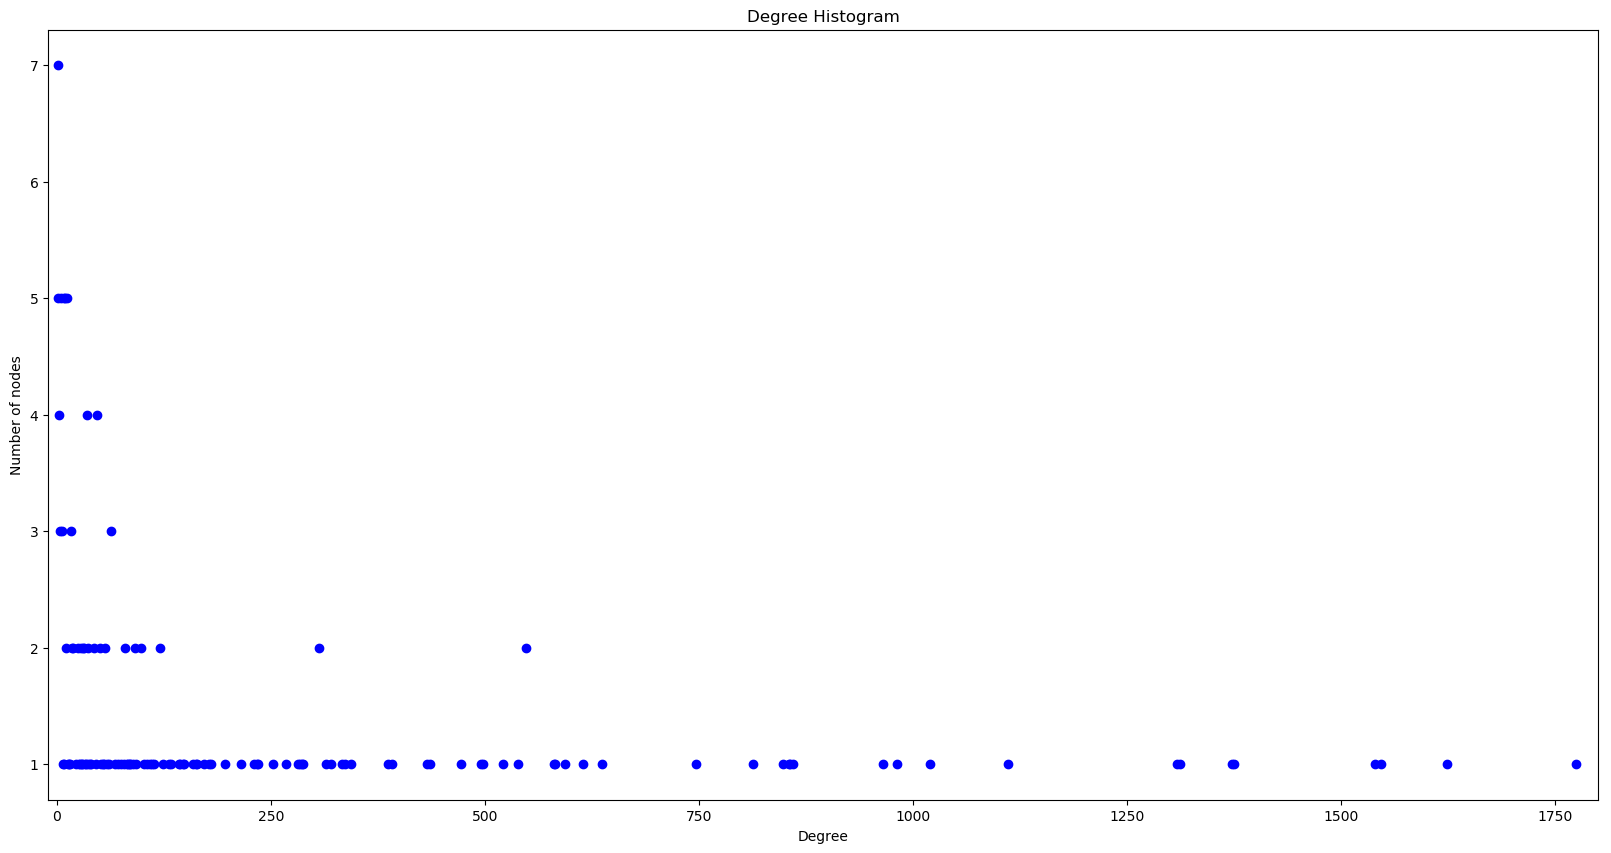

In [81]:
plt.rcdefaults()
fig,ax = plt.subplots(figsize=(20,10))
plt.scatter(deg, cnt, color='b')
plt.xlim(-10, 1800)


plt.title("Degree Histogram")
plt.ylabel("Number of nodes")
plt.xlabel("Degree")
plt.savefig("degree_distribution.png", format = "png", dpi = 300)
plt.show()

----------------------------------------------------
in-degree list
Counter({1: 7, 9: 5, 5: 5, 12: 5, 2: 5, 10: 5, 47: 4, 35: 4, 3: 4, 17: 3, 4: 3, 63: 3, 6: 3, 11: 2, 18: 2, 99: 2, 306: 2, 51: 2, 121: 2, 32: 2, 548: 2, 91: 2, 80: 2, 56: 2, 28: 2, 37: 2, 25: 2, 19: 2, 44: 2, 31: 2, 1902: 1, 13431: 1, 9091: 1, 18817: 1, 5737: 1, 1308: 1, 8007: 1, 16663: 1, 315: 1, 18514: 1, 7270: 1, 1375: 1, 3051: 1, 15978: 1, 8830: 1, 2111: 1, 1547: 1, 3156: 1, 2956: 1, 14340: 1, 4116: 1, 4086: 1, 3103: 1, 13024: 1, 6228: 1, 2181: 1, 539: 1, 5107: 1, 2354: 1, 1539: 1, 79: 1, 3284: 1, 286: 1, 124: 1, 333: 1, 1859: 1, 1020: 1, 68: 1, 134: 1, 581: 1, 178: 1, 235: 1, 230: 1, 3479: 1, 3606: 1, 1373: 1, 2992: 1, 387: 1, 2513: 1, 1883: 1, 1111: 1, 163: 1, 855: 1, 1624: 1, 3260: 1, 593: 1, 614: 1, 965: 1, 288: 1, 1960: 1, 436: 1, 856: 1, 1978: 1, 848: 1, 159: 1, 392: 1, 86: 1, 981: 1, 860: 1, 284: 1, 432: 1, 234: 1, 164: 1, 268: 1, 521: 1, 180: 1, 3240: 1, 29: 1, 14: 1, 215: 1, 472: 1, 582: 1, 1774: 1, 498: 1,

Calculating best minimal value for power law fit
C:\Users\Ceiec04\Anaconda3\envs\tensorflow-gpu\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
C:\Users\Ceiec04\Anaconda3\envs\tensorflow-gpu\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


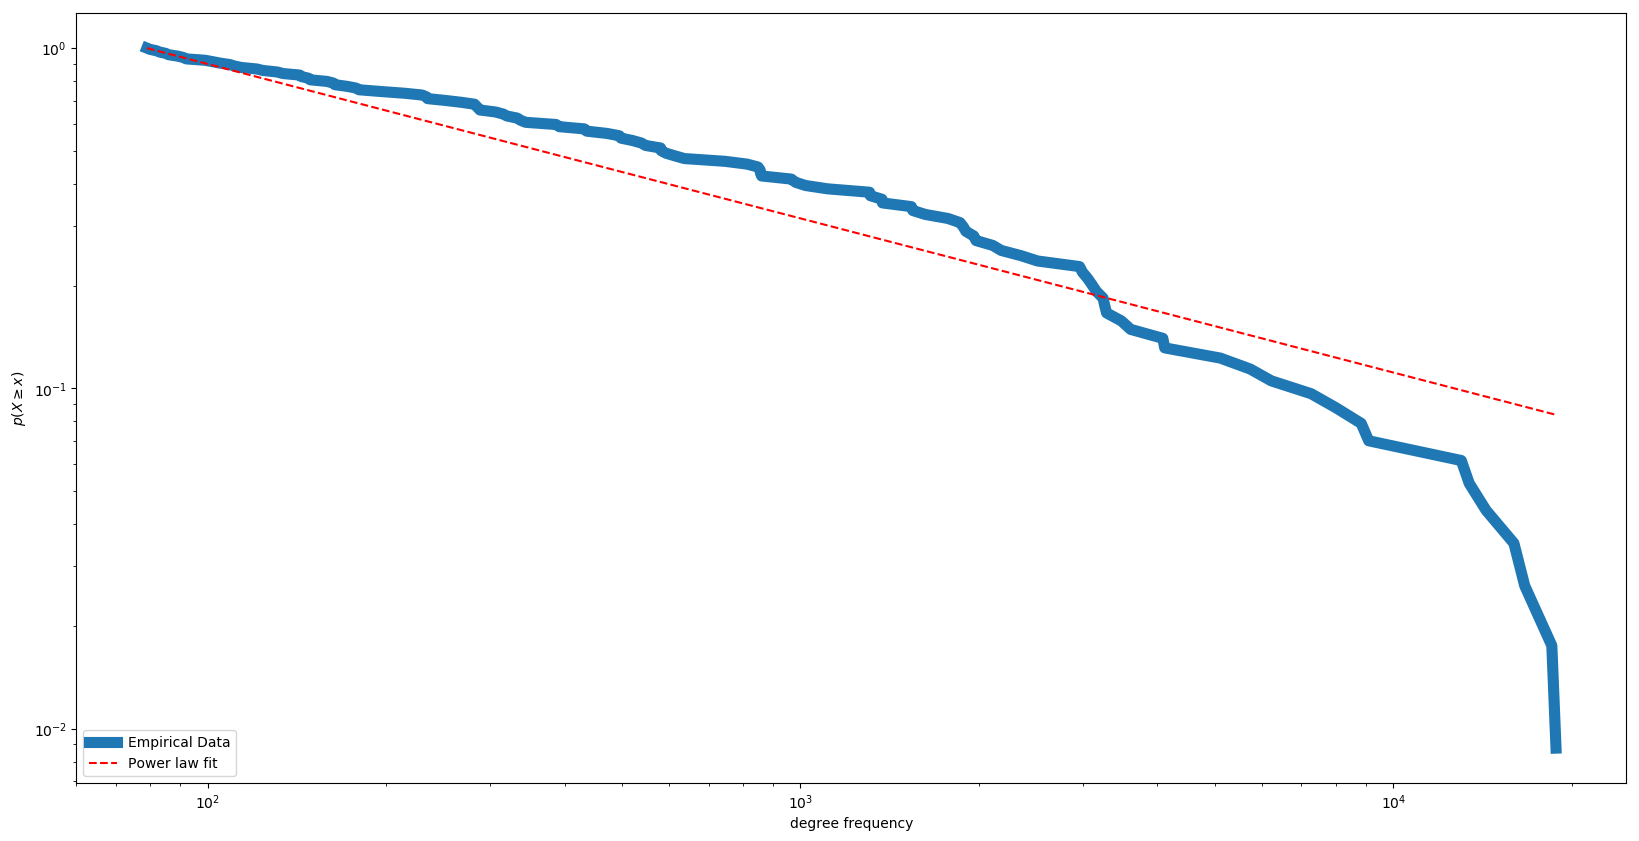

In [39]:
print ("----------------------------------------------------")
print ("in-degree list")

degree_nodes_list=Counter(dict(G.degree(weight = 'weight')).values())
print(Counter(degree_nodes_list))

num_nodes=[]
degrees=[]

for degree_nodes in degree_nodes_list:
    num_nodes.append(degree_nodes_list[degree_nodes])
    degrees.append(degree_nodes)
print ("----------------------------------------------------")
print ("Num nodes")
print (num_nodes)
print ("in-degrees")
print (degrees)

print ("----------------------------------------------------")
print ("Nodes labeled and degrees")
print (G.degree(weight = 'weight'))

print ("----------------------------------------------------")
data = degrees
results = powerlaw.Fit(data)
print ("Alpha value nodes is")
print (results.power_law.alpha)
print ("Xmin value nodes is")
print (results.power_law.xmin)

in_labels_list=[]
in_labels_list=G.degree(weight = 'weight')

fit = powerlaw.Fit(data, discrete=True)

fit.distribution_compare('power_law', 'lognormal')
fig = plt.figure(figsize=(20, 10))
fig = fit.plot_ccdf(linewidth=8, label='Empirical Data')
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')

fig.set_ylabel(r"$p(X\geq x)$")
fig.set_xlabel(r"degree frequency")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)
plt.savefig("degree_distribution_power_law.png", format = "png", dpi = 300)

# Grafos mensuales y sus métricas

## ENERO

In [43]:
enero_mask = data['DATE_CASE'].map(lambda x: x.month) == 1
enero = data[enero_mask]
enero

NUMBER                    CLASSIF  DATE_CASE        REF  \
2520    2541.0  information for follow-up 2019-01-31  2019.0359   
2521    2543.0           border rejection 2019-01-31  2019.0346   
2522    2545.0                      alert 2019-01-31  2019.0345   
2523    2547.0  information for attention 2019-01-31  2019.0354   
2524    2549.0           border rejection 2019-01-31  2019.0350   
2525    2551.0           border rejection 2019-01-31  2019.0349   
2526    2553.0                      alert 2019-01-30  2019.0333   
2527    2555.0  information for attention 2019-01-30  2019.0328   
2528    2557.0  information for follow-up 2019-01-30  2019.0342   
2529    2559.0  information for attention 2019-01-30  2019.0324   
2530    2561.0  information for follow-up 2019-01-30  2019.0339   
2531    2563.0           border rejection 2019-01-30  2019.0343   
2532    2565.0           border rejection 2019-01-30  2019.0335   
2533    2567.0  information for attention 2019-01-30  2019.0330   
2534    2569.0  information for attention 2019-01-30  2019.0323   
2535    2571.0  information for follow-up 2019-01-29  2019.0311   
2536    2573.0           border rejection 2019-01-29  2019.0316   
2537    2575.0                      alert 2019-01-29  2019.0308   
2538    2577.0                      alert 2019-01-29  2019.0318   
2539    2579.0                      alert 2019-01-29  2019.0309   
2540    2581.0           border rejection 2019-01-29  2019.0314   
2541    2583.0  information for attention 2019-01-29  2019.0321   
2542    2585.0           border rejection 2019-01-29  2019.0310   
2543    2587.0                      alert 2019-01-28  2019.0304   
2544    2589.0  information for follow-up 2019-01-28  2019.0299   
2545    2591.0           border rejection 2019-01-28  2019.0300   
2546    2593.0                      alert 2019-01-25  2019.0297   
2547    2595.0  information for follow-up 2019-01-25  2019.0293   
2548    2597.0                      alert 2019-01-25  2019.0294   
2549    2599.0  information for attention 2019-01-25  2019.0286   
...        ...                        ...        ...        ...   
56189  56180.0                      alert 1997-01-24    1997.01   
56215  56231.0                      alert 1994-01-17    1994.03   
56216  56233.0                      alert 1994-01-03    1994.01   
56226  56253.0                      alert 1993-01-22    1993.03   
56227  56255.0                      alert 1993-01-06    1993.01   
56264  56230.0                      alert 1994-01-26    1994.04   
56265  56232.0                      alert 1994-01-11    1994.02   
56276  56254.0                      alert 1993-01-12    1993.02   
56282  56266.0                      alert 1992-01-09    1992.01   
56303  56307.0                      alert 1990-01-18    1990.01   
56318  56337.0                      alert 1989-01-31    1989.01   
56319  56339.0                information 1989-01-18     1989.B   
56344  56389.0                      alert 1987-01-23    1987.02   
56368  56338.0                information 1989-01-18     1989.C   
56369  56340.0                information 1989-01-18     1989.A   
56385  56372.0                      alert 1988-01-08    1988.01   
56393  56388.0                      alert 1987-01-23    1987.03   
56394  56390.0                      alert 1987-01-09    1987.01   
56402  56405.0                      alert 1986-01-09    1986.02   
56420  56441.0                      alert 1984-01-23    1984.03   
56421  56443.0                      alert 1984-01-04    1984.01   
56427  56455.0                      alert 1983-01-04    1983.01   
56437  56475.0                      alert 1981-01-06    1981.01   
56447  56404.0                      alert 1986-01-29    1986.03   
56448  56406.0                      alert 1986-01-07    1986.01   
56465  56440.0                      alert 1984-01-25    1984.04   
56466  56442.0                      alert 1984-01-16    1984.02   
56472  56454.0                      alert 1983-01-27   

In [27]:
all_routes = []
for index, row in enero.iterrows():
    origin=row['COUNT_ORIGEN'].split(",")   
    destiny=row['COUNT_DESTIN'].split(",") 
    concern=row['COUNT_CONCERN'].split(",")
    for i in origin:
        if i!=" " and i!= 'INFOSAN' and i!='Commission Services'and i!='unknown origin'and i!='European Food Safety Authority': 
            for j in destiny:
                if j!=" " and i!=j and j!= 'INFOSAN' and j!='Commission Services'and j!='unknown origin'and j!='European Food Safety Authority': 
                    route = (i,j)
                    all_routes.append(route)
                    
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)   
                else:
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)     

In [29]:
G = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(all_routes).items())

In [30]:
sorted(G.in_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('Spain', 1115),
 ('Germany', 953),
 ('United Kingdom', 886),
 ('Italy', 819),
 ('Netherlands', 633),
 ('France', 609),
 ('Belgium', 367),
 ('Austria', 360),
 ('Greece', 325),
 ('Denmark', 317),
 ('Finland', 273),
 ('Poland', 242),
 ('Sweden', 193),
 ('Switzerland', 163),
 ('Czech Republic', 155),
 ('Bulgaria', 155),
 ('Portugal', 148),
 ('Hungary', 143),
 ('Ireland', 134),
 ('Slovakia', 130),
 ('Norway', 128),
 ('Cyprus', 125),
 ('Slovenia', 113),
 ('Luxembourg', 111),
 ('Lithuania', 108),
 ('United Arab Emirates', 98),
 ('Malta', 83),
 ('Latvia', 82),
 ('Russia', 82),
 ('Estonia', 81),
 ('Hong Kong', 76),
 ('Ukraine', 72),
 ('Romania', 69),
 ('Croatia', 37),
 ('United States', 24),
 ('Iceland', 24),
 ('Belarus', 24),
 ('Singapore', 22),
 ('India', 22),
 ('China', 18),
 ('Turkey', 15),
 ('Vietnam', 15),
 ('Andorra', 15),
 ('South Africa', 15),
 ('South Korea', 14),
 ('Australia', 13),
 ('Mauritius', 12),
 ('Canada', 11),
 ('Bosnia and Herzegovina', 11),
 ('Faeroe Islands', 10),
 ('Br

In [31]:
sorted(G.out_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('China', 1381),
 ('Turkey', 698),
 ('United States', 662),
 ('India', 526),
 ('Germany', 397),
 ('Poland', 366),
 ('Spain', 362),
 ('Netherlands', 336),
 ('Belgium', 311),
 ('Italy', 308),
 ('Iran', 302),
 ('United Kingdom', 285),
 ('France', 259),
 ('Brazil', 218),
 ('Hungary', 190),
 ('Vietnam', 184),
 ('Thailand', 174),
 ('Egypt', 161),
 ('Argentina', 116),
 ('Czech Republic', 101),
 ('Nigeria', 95),
 ('Denmark', 83),
 ('South Korea', 73),
 ('Taiwan', 69),
 ('Malaysia', 68),
 ('Sweden', 66),
 ('Austria', 65),
 ('Romania', 64),
 ('Bangladesh', 64),
 ('Philippines', 63),
 ('Ghana', 63),
 ('Indonesia', 61),
 ('Morocco', 60),
 ('Ireland', 57),
 ('Russia', 56),
 ('Tunisia', 56),
 ('Hong Kong', 54),
 ('Colombia', 52),
 ('Sri Lanka', 51),
 ('Switzerland', 49),
 ('Ukraine', 48),
 ('Australia', 48),
 ('Greece', 46),
 ('Chile', 45),
 ('South Africa', 45),
 ('Latvia', 43),
 ('Peru', 41),
 ('Lebanon', 40),
 ('Lithuania', 39),
 ('Canada', 36),
 ('Mexico', 34),
 ('Uruguay', 33),
 ('Slovakia', 3

In [32]:
nx.density(G)

0.0630202958376333

In [33]:
nx.average_clustering(G)

0.5662426953288677

## FEBRERO

In [34]:
febrero_mask = data['DATE_CASE'].map(lambda x: x.month) == 2
febrero = data[febrero_mask]
febrero

NUMBER                    CLASSIF  DATE_CASE        REF  \
2140    2181.0  information for attention 2019-02-28  2019.0792   
2141    2183.0  information for attention 2019-02-28  2019.0802   
2142    2185.0           border rejection 2019-02-28  2019.0791   
2143    2187.0  information for attention 2019-02-28  2019.0795   
2144    2189.0                      alert 2019-02-28  2019.0783   
2145    2191.0                      alert 2019-02-28  2019.0800   
2146    2193.0  information for attention 2019-02-28  2019.0777   
2147    2195.0  information for attention 2019-02-28  2019.0785   
2148    2197.0           border rejection 2019-02-28  2019.0797   
2149    2199.0           border rejection 2019-02-28  2019.0788   
2189    2180.0           border rejection 2019-02-28  2019.0787   
2190    2182.0           border rejection 2019-02-28  2019.0799   
2191    2184.0  information for follow-up 2019-02-28  2019.0793   
2192    2186.0                      alert 2019-02-28  2019.0778   
2193    2188.0  information for follow-up 2019-02-28  2019.0786   
2194    2190.0  information for attention 2019-02-28  2019.0789   
2195    2192.0  information for attention 2019-02-28  2019.0782   
2196    2194.0  information for attention 2019-02-28  2019.0796   
2197    2196.0           border rejection 2019-02-28  2019.0801   
2198    2198.0           border rejection 2019-02-28  2019.0794   
2199    2200.0  information for attention 2019-02-28  2019.0784   
2200    2201.0  information for attention 2019-02-28  2019.0780   
2201    2203.0                      alert 2019-02-27  2019.0761   
2202    2205.0                      alert 2019-02-27  2019.0774   
2203    2207.0                      alert 2019-02-27  2019.0766   
2204    2209.0           border rejection 2019-02-27  2019.0763   
2205    2211.0                      alert 2019-02-27  2019.0764   
2206    2213.0  information for follow-up 2019-02-27  2019.0769   
2207    2215.0  information for follow-up 2019-02-27  2019.0765   
2208    2217.0  information for attention 2019-02-27  2019.0757   
...        ...                        ...        ...        ...   
56204  56209.0                information 1995-02-16     1995.A   
56205  56211.0                      alert 1995-02-09    1995.01   
56214  56229.0                      alert 1994-02-26    1994.05   
56225  56251.0                      alert 1993-02-10    1993.04   
56242  56285.0                      alert 1991-02-12    1991.01   
56254  56210.0                      alert 1995-02-15    1995.02   
56275  56252.0                      alert 1993-02-02    1993.05   
56291  56284.0                      alert 1991-02-25    1991.02   
56302  56305.0                      alert 1990-02-23    1990.03   
56316  56333.0                      alert 1989-02-17    1989.05   
56317  56335.0                      alert 1989-02-06    1989.03   
56335  56371.0                      alert 1988-02-02    1988.02   
56343  56387.0                      alert 1987-02-11    1987.04   
56352  56306.0                      alert 1990-02-13    1990.02   
56365  56332.0                      alert 1989-02-28    1989.06   
56366  56334.0                      alert 1989-02-07    1989.04   
56367  56336.0                      alert 1989-02-03    1989.02   
56384  56370.0                      alert 1988-02-16    1988.03   
56392  56386.0                      alert 1987-02-16    1987.05   
56401  56403.0                      alert 1986-02-28    1986.04   
56418  56437.0                      alert 1984-02-23    1984.07   
56419  56439.0                      alert 1984-02-07    1984.05   
56425  56451.0                      alert 1983-02-21    1983.05   
56426  56453.0                      alert 1983-02-04    1983.03   
56431  56463.0                      alert 1982-02-07    1982.02   
56446  56402.0                      alert 1986-02-28    1986.05   
56463  56436.0                      alert 1984-02-28    1984.08   
56464  56438.0                      alert 1984-02-09   

In [35]:
all_routes = []
for index, row in febrero.iterrows():
    origin=row['COUNT_ORIGEN'].split(",")   
    destiny=row['COUNT_DESTIN'].split(",") 
    concern=row['COUNT_CONCERN'].split(",")
    for i in origin:
        if i!=" " and i!= 'INFOSAN' and i!='Commission Services'and i!='unknown origin'and i!='European Food Safety Authority': 
            for j in destiny:
                if j!=" " and i!=j and j!= 'INFOSAN' and j!='Commission Services'and j!='unknown origin'and j!='European Food Safety Authority': 
                    route = (i,j)
                    all_routes.append(route)
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)   
                else:
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)   

In [37]:
G = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(all_routes).items())

In [38]:
sorted(G.in_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('Spain', 1183),
 ('Germany', 1023),
 ('Italy', 1014),
 ('United Kingdom', 737),
 ('Netherlands', 705),
 ('France', 636),
 ('Belgium', 454),
 ('Slovakia', 400),
 ('Denmark', 396),
 ('Sweden', 364),
 ('Austria', 325),
 ('Ireland', 300),
 ('Slovenia', 270),
 ('Poland', 259),
 ('Greece', 251),
 ('Finland', 212),
 ('Portugal', 208),
 ('Switzerland', 188),
 ('Czech Republic', 184),
 ('Malta', 172),
 ('Bulgaria', 146),
 ('Norway', 144),
 ('Hungary', 143),
 ('Luxembourg', 122),
 ('Cyprus', 114),
 ('Lithuania', 110),
 ('Romania', 102),
 ('Croatia', 70),
 ('Latvia', 68),
 ('Iceland', 61),
 ('Estonia', 58),
 ('Russia', 57),
 ('Andorra', 49),
 ('Ukraine', 47),
 ('United Arab Emirates', 42),
 ('Bosnia and Herzegovina', 42),
 ('Republic of North Macedonia', 41),
 ('Turkey', 40),
 ('Belarus', 39),
 ('Hong Kong', 38),
 ('Albania', 37),
 ('Monaco', 34),
 ('Liechtenstein', 34),
 ('Moldova', 32),
 ('Kosovo', 31),
 ('Montenegro', 30),
 ('Indonesia', 29),
 ('Vatican City', 29),
 ('United States', 25),
 (

In [39]:
sorted(G.out_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('United States', 1222),
 ('China', 1054),
 ('Netherlands', 748),
 ('France', 608),
 ('India', 545),
 ('Turkey', 530),
 ('United Kingdom', 492),
 ('Germany', 454),
 ('Poland', 411),
 ('Italy', 409),
 ('Spain', 373),
 ('Belgium', 358),
 ('Iran', 330),
 ('Vietnam', 252),
 ('Thailand', 230),
 ('Brazil', 219),
 ('Sweden', 202),
 ('Romania', 182),
 ('Egypt', 155),
 ('Indonesia', 136),
 ('Argentina', 118),
 ('Denmark', 108),
 ('Czech Republic', 103),
 ('Austria', 99),
 ('Hong Kong', 98),
 ('Canada', 91),
 ('Luxembourg', 91),
 ('Morocco', 83),
 ('Pakistan', 79),
 ('Switzerland', 74),
 ('Hungary', 72),
 ('Ireland', 69),
 ('South Korea', 64),
 ('South Africa', 62),
 ('Ghana', 54),
 ('Nigeria', 52),
 ('Peru', 48),
 ('Tunisia', 47),
 ('Lebanon', 46),
 ('Greece', 39),
 ('Chile', 36),
 ('Bangladesh', 33),
 ('Senegal', 32),
 ('Syria', 32),
 ('Sri Lanka', 30),
 ('Malaysia', 30),
 ('Uzbekistan', 29),
 ('Sudan', 29),
 ('Taiwan', 29),
 ('Ukraine', 29),
 ('Russia', 28),
 ('Finland', 27),
 ('Portugal', 2

In [40]:
print(nx.density(G),nx.average_clustering(G))

0.056936771025168816 0.6441425386151038


## MARZO

In [41]:
mes_num = 3
mes_mask = data['DATE_CASE'].map(lambda x: x.month) == mes_num
mes = data[mes_mask]
all_routes = []
for index, row in mes.iterrows():
    origin=row['COUNT_ORIGEN'].split(",")   
    destiny=row['COUNT_DESTIN'].split(",") 
    concern=row['COUNT_CONCERN'].split(",")
    for i in origin:
        if i!=" " and i!= 'INFOSAN' and i!='Commission Services'and i!='unknown origin'and i!='European Food Safety Authority': 
            for j in destiny:
                if j!=" " and i!=j and j!= 'INFOSAN' and j!='Commission Services'and j!='unknown origin'and j!='European Food Safety Authority': 
                    route = (i,j)
                    all_routes.append(route)
                    
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)   
                else:
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)
G = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(all_routes).items())

In [42]:
sorted(G.in_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('Germany', 1180),
 ('Spain', 1098),
 ('Italy', 1011),
 ('United Kingdom', 846),
 ('Netherlands', 842),
 ('France', 612),
 ('Belgium', 517),
 ('Austria', 366),
 ('Denmark', 337),
 ('Czech Republic', 301),
 ('Sweden', 266),
 ('Greece', 259),
 ('Poland', 254),
 ('Slovakia', 248),
 ('Finland', 218),
 ('Switzerland', 202),
 ('Slovenia', 177),
 ('Ireland', 157),
 ('Norway', 153),
 ('Hungary', 140),
 ('Luxembourg', 133),
 ('Romania', 127),
 ('Bulgaria', 125),
 ('Portugal', 124),
 ('Croatia', 123),
 ('Latvia', 119),
 ('Cyprus', 110),
 ('Lithuania', 104),
 ('Estonia', 92),
 ('United Arab Emirates', 89),
 ('Hong Kong', 79),
 ('Malta', 76),
 ('United States', 34),
 ('China', 31),
 ('Russia', 28),
 ('Iceland', 25),
 ('Turkey', 23),
 ('Ukraine', 21),
 ('Egypt', 21),
 ('India', 20),
 ('Andorra', 18),
 ('Lebanon', 17),
 ('Singapore', 15),
 ('Canada', 13),
 ('Vietnam', 13),
 ('Serbia', 13),
 ('Republic of North Macedonia', 12),
 ('Australia', 12),
 ('San Marino', 11),
 ('Gibraltar', 11),
 ('Belarus'

In [43]:
sorted(G.out_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('China', 1365),
 ('Germany', 690),
 ('France', 635),
 ('Turkey', 597),
 ('India', 581),
 ('Netherlands', 556),
 ('Italy', 553),
 ('Spain', 422),
 ('United States', 407),
 ('Iran', 397),
 ('United Kingdom', 305),
 ('Poland', 281),
 ('Thailand', 266),
 ('Vietnam', 251),
 ('Brazil', 220),
 ('Belgium', 191),
 ('Argentina', 191),
 ('Ireland', 160),
 ('Hong Kong', 157),
 ('Egypt', 119),
 ('Indonesia', 91),
 ('Pakistan', 90),
 ('Chile', 84),
 ('Austria', 82),
 ('Greece', 81),
 ('Switzerland', 80),
 ('Romania', 80),
 ('South Korea', 80),
 ('Sweden', 76),
 ('Denmark', 75),
 ('Taiwan', 74),
 ('Ghana', 74),
 ('Hungary', 72),
 ('Morocco', 65),
 ('Bangladesh', 60),
 ('Bulgaria', 57),
 ('Senegal', 57),
 ('Nigeria', 56),
 ('Malaysia', 54),
 ('Ukraine', 53),
 ('Peru', 52),
 ('Sudan', 49),
 ('Slovakia', 45),
 ('Portugal', 43),
 ('Latvia', 43),
 ('Russia', 39),
 ('Madagascar', 38),
 ('Tunisia', 37),
 ('Lithuania', 36),
 ('South Africa', 36),
 ('Sri Lanka', 31),
 ('Uzbekistan', 30),
 ('Japan', 28),
 ('

In [44]:
print(nx.density(G),nx.average_clustering(G))

0.05782122905027933 0.5716365101682239


## ABRIL

In [45]:
mes_num = 4
mes_mask = data['DATE_CASE'].map(lambda x: x.month) == mes_num
mes = data[mes_mask]
all_routes = []
for index, row in mes.iterrows():
    origin=row['COUNT_ORIGEN'].split(",")   
    destiny=row['COUNT_DESTIN'].split(",") 
    concern=row['COUNT_CONCERN'].split(",")
    for i in origin:
        if i!=" " and i!= 'INFOSAN' and i!='Commission Services'and i!='unknown origin'and i!='European Food Safety Authority': 
            for j in destiny:
                if j!=" " and i!=j and j!= 'INFOSAN' and j!='Commission Services'and j!='unknown origin'and j!='European Food Safety Authority': 
                    route = (i,j)
                    all_routes.append(route)
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)   
                else:
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)
G = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(all_routes).items())

In [46]:
sorted(G.in_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('Spain', 1168),
 ('Germany', 1010),
 ('Italy', 916),
 ('Netherlands', 888),
 ('United Kingdom', 698),
 ('France', 609),
 ('Belgium', 477),
 ('Austria', 307),
 ('Poland', 303),
 ('Czech Republic', 269),
 ('Greece', 268),
 ('Sweden', 265),
 ('Finland', 237),
 ('Slovakia', 230),
 ('Denmark', 223),
 ('Slovenia', 211),
 ('Switzerland', 196),
 ('Cyprus', 193),
 ('Ireland', 182),
 ('Bulgaria', 165),
 ('Portugal', 152),
 ('Norway', 146),
 ('Hungary', 135),
 ('Luxembourg', 127),
 ('Lithuania', 105),
 ('Croatia', 97),
 ('Romania', 97),
 ('Estonia', 82),
 ('Latvia', 74),
 ('Malta', 48),
 ('Taiwan', 43),
 ('Hong Kong', 38),
 ('Bosnia and Herzegovina', 30),
 ('Russia', 30),
 ('United Arab Emirates', 29),
 ('United States', 27),
 ('India', 27),
 ('Iceland', 25),
 ('Turkey', 24),
 ('Morocco', 23),
 ('Canada', 21),
 ('Nigeria', 19),
 ('Ukraine', 17),
 ('Andorra', 16),
 ('Belarus', 16),
 ('Japan', 16),
 ('Singapore', 15),
 ('Australia', 15),
 ('China', 13),
 ('Chile', 13),
 ('Serbia', 13),
 ('Jersey'

In [47]:
sorted(G.out_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('China', 1096),
 ('France', 661),
 ('Germany', 517),
 ('Turkey', 508),
 ('United Kingdom', 498),
 ('Spain', 473),
 ('India', 463),
 ('Netherlands', 460),
 ('United States', 390),
 ('Italy', 372),
 ('Iran', 330),
 ('Poland', 312),
 ('Brazil', 302),
 ('Belgium', 266),
 ('Thailand', 248),
 ('Vietnam', 221),
 ('Ukraine', 190),
 ('Czech Republic', 163),
 ('Denmark', 152),
 ('Pakistan', 148),
 ('Indonesia', 141),
 ('Morocco', 137),
 ('Argentina', 131),
 ('Hong Kong', 131),
 ('Ghana', 111),
 ('Uzbekistan', 107),
 ('Egypt', 94),
 ('Nigeria', 94),
 ('Bangladesh', 92),
 ('Canada', 91),
 ('Ireland', 83),
 ('Uruguay', 76),
 ('Austria', 72),
 ('Chile', 71),
 ('Hungary', 62),
 ('Peru', 60),
 ('Romania', 55),
 ('Sri Lanka', 55),
 ('Latvia', 50),
 ('Senegal', 45),
 ('Lithuania', 42),
 ('Dominican Republic', 40),
 ('Slovakia', 37),
 ('Malaysia', 35),
 ('Portugal', 34),
 ('Togo', 34),
 ('Taiwan', 33),
 ('South Africa', 31),
 ('Ecuador', 31),
 ('Sweden', 30),
 ('Estonia', 30),
 ('Bosnia and Herzegovina

In [48]:
print(nx.density(G),nx.average_clustering(G))

0.05911847715126404 0.594252421975042


## MAYO

In [49]:
mes_num = 5
mes_mask = data['DATE_CASE'].map(lambda x: x.month) == mes_num
mes = data[mes_mask]
all_routes = []
for index, row in mes.iterrows():
    origin=row['COUNT_ORIGEN'].split(",")   
    destiny=row['COUNT_DESTIN'].split(",") 
    concern=row['COUNT_CONCERN'].split(",")
    for i in origin:
        if i!=" " and i!= 'INFOSAN' and i!='Commission Services'and i!='unknown origin'and i!='European Food Safety Authority': 
            for j in destiny:
                if j!=" " and i!=j and j!= 'INFOSAN' and j!='Commission Services'and j!='unknown origin'and j!='European Food Safety Authority': 
                    route = (i,j)
                    all_routes.append(route)
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)   
                else:
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)
G = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(all_routes).items())

In [50]:
sorted(G.in_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('Spain', 1140),
 ('Italy', 983),
 ('Germany', 913),
 ('Netherlands', 752),
 ('United Kingdom', 693),
 ('France', 562),
 ('Belgium', 435),
 ('Denmark', 353),
 ('Austria', 286),
 ('Ireland', 280),
 ('Czech Republic', 269),
 ('Greece', 264),
 ('Finland', 244),
 ('Poland', 241),
 ('Sweden', 226),
 ('Bulgaria', 176),
 ('Slovenia', 169),
 ('Norway', 163),
 ('Slovakia', 162),
 ('Switzerland', 148),
 ('Lithuania', 141),
 ('Latvia', 137),
 ('Hungary', 135),
 ('Portugal', 130),
 ('Cyprus', 128),
 ('United States', 111),
 ('Luxembourg', 111),
 ('Romania', 104),
 ('Estonia', 100),
 ('Croatia', 62),
 ('Malta', 61),
 ('Montenegro', 51),
 ('Guernsey', 47),
 ('Hong Kong', 38),
 ('Ukraine', 33),
 ('Iceland', 32),
 ('Russia', 31),
 ('Canada', 29),
 ('Andorra', 28),
 ('United Arab Emirates', 18),
 ('Taiwan', 18),
 ('Singapore', 15),
 ('Moldova', 13),
 ('Bosnia and Herzegovina', 12),
 ('Serbia', 11),
 ('Bermuda', 10),
 ('Japan', 10),
 ('Peru', 9),
 ('Brazil', 7),
 ('Gabon', 7),
 ('Turkey', 6),
 ('China'

In [51]:
sorted(G.out_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('China', 1212),
 ('India', 643),
 ('Turkey', 606),
 ('France', 571),
 ('United States', 547),
 ('Spain', 444),
 ('Germany', 440),
 ('Poland', 429),
 ('Brazil', 325),
 ('Netherlands', 324),
 ('Italy', 292),
 ('Belgium', 291),
 ('United Kingdom', 258),
 ('Iran', 251),
 ('Thailand', 217),
 ('Vietnam', 211),
 ('Czech Republic', 181),
 ('Argentina', 151),
 ('Indonesia', 139),
 ('Canada', 117),
 ('Ukraine', 115),
 ('Bulgaria', 101),
 ('Egypt', 97),
 ('Pakistan', 78),
 ('Morocco', 74),
 ('Nigeria', 69),
 ('Austria', 67),
 ('Ghana', 67),
 ('Chile', 66),
 ('Russia', 66),
 ('Denmark', 64),
 ('Peru', 64),
 ('Hungary', 61),
 ('Greece', 58),
 ('Lithuania', 55),
 ('Bangladesh', 50),
 ('Sri Lanka', 49),
 ('Israel', 47),
 ('Hong Kong', 46),
 ('Taiwan', 46),
 ('Philippines', 46),
 ('Portugal', 44),
 ('Australia', 43),
 ('Ecuador', 41),
 ('Switzerland', 40),
 ('Romania', 40),
 ('Croatia', 40),
 ('Serbia', 38),
 ('Colombia', 37),
 ('Sweden', 36),
 ('Slovakia', 36),
 ('Gambia', 35),
 ('Malaysia', 35),
 

In [52]:
print(nx.density(G),nx.average_clustering(G))

0.06385601577909271 0.6097001333658918


## JUNIO

In [53]:
mes_num = 6
mes_mask = data['DATE_CASE'].map(lambda x: x.month) == mes_num
mes = data[mes_mask]
all_routes = []
for index, row in mes.iterrows():
    origin=row['COUNT_ORIGEN'].split(",")   
    destiny=row['COUNT_DESTIN'].split(",") 
    concern=row['COUNT_CONCERN'].split(",")
    for i in origin:
        if i!=" " and i!= 'INFOSAN' and i!='Commission Services'and i!='unknown origin'and i!='European Food Safety Authority': 
            for j in destiny:
                if j!=" " and i!=j and j!= 'INFOSAN' and j!='Commission Services'and j!='unknown origin'and j!='European Food Safety Authority': 
                    route = (i,j)
                    all_routes.append(route)
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)   
                else:
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)
G = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(all_routes).items())

In [54]:
sorted(G.in_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('Spain', 1252),
 ('Germany', 1017),
 ('Italy', 976),
 ('Netherlands', 864),
 ('United Kingdom', 793),
 ('France', 693),
 ('Belgium', 508),
 ('Denmark', 392),
 ('Austria', 353),
 ('Finland', 311),
 ('Czech Republic', 304),
 ('Poland', 293),
 ('Sweden', 266),
 ('Greece', 238),
 ('Ireland', 221),
 ('Hungary', 210),
 ('Slovakia', 193),
 ('Norway', 192),
 ('Slovenia', 182),
 ('Bulgaria', 175),
 ('Switzerland', 173),
 ('Cyprus', 168),
 ('Luxembourg', 163),
 ('Portugal', 144),
 ('Estonia', 141),
 ('Romania', 121),
 ('Latvia', 119),
 ('Lithuania', 102),
 ('Croatia', 75),
 ('Malta', 71),
 ('Ukraine', 51),
 ('Hong Kong', 39),
 ('United States', 36),
 ('Iceland', 33),
 ('United Arab Emirates', 28),
 ('Bosnia and Herzegovina', 23),
 ('Russia', 22),
 ('Serbia', 19),
 ('Andorra', 16),
 ('Egypt', 15),
 ('Faeroe Islands', 15),
 ('Turkey', 14),
 ('Montenegro', 12),
 ('Pakistan', 12),
 ('Democratic Republic of the Congo', 12),
 ('Singapore', 12),
 ('China', 11),
 ('Australia', 11),
 ('San Marino', 10)

In [55]:
sorted(G.out_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('China', 1168),
 ('Netherlands', 805),
 ('United States', 777),
 ('France', 585),
 ('Poland', 568),
 ('Turkey', 535),
 ('India', 499),
 ('Germany', 456),
 ('Spain', 419),
 ('Thailand', 321),
 ('Brazil', 319),
 ('Italy', 315),
 ('United Kingdom', 298),
 ('Iran', 295),
 ('Vietnam', 280),
 ('Argentina', 262),
 ('Belgium', 242),
 ('Denmark', 157),
 ('Hungary', 137),
 ('Egypt', 134),
 ('Hong Kong', 108),
 ('Chile', 106),
 ('Indonesia', 97),
 ('Ghana', 86),
 ('Switzerland', 85),
 ('Morocco', 85),
 ('Romania', 80),
 ('Syria', 78),
 ('Czech Republic', 74),
 ('Ukraine', 74),
 ('South Africa', 70),
 ('Sweden', 68),
 ('Nigeria', 68),
 ('Malaysia', 66),
 ('Bulgaria', 65),
 ('Japan', 60),
 ('Austria', 55),
 ('Singapore', 53),
 ('Bangladesh', 52),
 ('Croatia', 51),
 ('Greece', 48),
 ('Portugal', 46),
 ('Sri Lanka', 44),
 ('Pakistan', 43),
 ('Russia', 43),
 ('Philippines', 41),
 ('South Korea', 40),
 ('Canada', 39),
 ('Madagascar', 38),
 ('Slovakia', 37),
 ('Lithuania', 36),
 ('Ecuador', 36),
 ('Tu

In [56]:
print(nx.density(G),nx.average_clustering(G))

0.06577227382180943 0.6437537330310549


## JULIO

In [57]:
mes_num = 7
mes_mask = data['DATE_CASE'].map(lambda x: x.month) == mes_num
mes = data[mes_mask]
all_routes = []
for index, row in mes.iterrows():
    origin=row['COUNT_ORIGEN'].split(",")   
    destiny=row['COUNT_DESTIN'].split(",") 
    concern=row['COUNT_CONCERN'].split(",")
    for i in origin:
        if i!=" " and i!= 'INFOSAN' and i!='Commission Services'and i!='unknown origin'and i!='European Food Safety Authority': 
            for j in destiny:
                if j!=" " and i!=j and j!= 'INFOSAN' and j!='Commission Services'and j!='unknown origin'and j!='European Food Safety Authority': 
                    route = (i,j)
                    all_routes.append(route)
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)   
                else:
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)
G = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(all_routes).items())

In [58]:
sorted(G.in_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('Spain', 1187),
 ('Germany', 1107),
 ('Italy', 1098),
 ('Netherlands', 878),
 ('United Kingdom', 773),
 ('France', 730),
 ('Belgium', 517),
 ('Estonia', 413),
 ('Austria', 404),
 ('Denmark', 396),
 ('Czech Republic', 343),
 ('Sweden', 335),
 ('Poland', 318),
 ('Hungary', 287),
 ('Switzerland', 269),
 ('Slovakia', 254),
 ('Greece', 249),
 ('Finland', 235),
 ('Ireland', 195),
 ('Slovenia', 191),
 ('Portugal', 185),
 ('Luxembourg', 173),
 ('Cyprus', 165),
 ('Norway', 132),
 ('Lithuania', 130),
 ('Romania', 122),
 ('Latvia', 120),
 ('Bulgaria', 119),
 ('United States', 115),
 ('Hong Kong', 106),
 ('Croatia', 97),
 ('United Arab Emirates', 93),
 ('Malta', 74),
 ('Turkmenistan', 60),
 ('Bosnia and Herzegovina', 50),
 ('Andorra', 42),
 ('Canada', 39),
 ('Turkey', 38),
 ('Russia', 38),
 ('Iceland', 38),
 ('Gibraltar', 36),
 ('China', 35),
 ('Israel', 34),
 ('Mexico', 31),
 ('Serbia', 30),
 ('Swaziland', 30),
 ('Japan', 28),
 ('Singapore', 27),
 ('Ukraine', 27),
 ('Morocco', 23),
 ('Australia

In [59]:
sorted(G.out_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('China', 1377),
 ('Netherlands', 841),
 ('United States', 829),
 ('India', 684),
 ('Spain', 665),
 ('France', 660),
 ('Germany', 633),
 ('United Kingdom', 575),
 ('Belgium', 567),
 ('Turkey', 455),
 ('Poland', 452),
 ('Italy', 442),
 ('Vietnam', 323),
 ('Brazil', 312),
 ('Thailand', 291),
 ('Hungary', 268),
 ('Denmark', 237),
 ('Iran', 231),
 ('Japan', 202),
 ('Argentina', 178),
 ('Hong Kong', 140),
 ('Indonesia', 134),
 ('Sri Lanka', 118),
 ('Egypt', 109),
 ('Nigeria', 102),
 ('South Korea', 94),
 ('Canada', 85),
 ('Morocco', 81),
 ('Chile', 80),
 ('Ghana', 73),
 ('Austria', 70),
 ('Czech Republic', 63),
 ('Pakistan', 59),
 ('Bangladesh', 59),
 ('Philippines', 58),
 ('Peru', 58),
 ('Greece', 56),
 ('Ecuador', 54),
 ('Ukraine', 52),
 ('Portugal', 50),
 ('Romania', 44),
 ('Lithuania', 42),
 ('South Africa', 40),
 ('Malaysia', 37),
 ('Australia', 36),
 ('Luxembourg', 34),
 ('Taiwan', 34),
 ('Russia', 34),
 ('Ireland', 33),
 ('Sweden', 33),
 ('New Zealand', 31),
 ('Sudan', 31),
 ('Latvi

In [60]:
print(nx.density(G),nx.average_clustering(G))

0.06306178177267038 0.6621180238937342


## AGOSTO

In [61]:
mes_num = 8
mes_mask = data['DATE_CASE'].map(lambda x: x.month) == mes_num
mes = data[mes_mask]
all_routes = []
for index, row in mes.iterrows():
    origin=row['COUNT_ORIGEN'].split(",")   
    destiny=row['COUNT_DESTIN'].split(",") 
    concern=row['COUNT_CONCERN'].split(",")
    for i in origin:   
        if i!=" " and i!= 'INFOSAN' and i!='Commission Services'and i!='unknown origin'and i!='European Food Safety Authority': 
            for j in destiny:
                if j!=" " and i!=j and j!= 'INFOSAN' and j!='Commission Services'and j!='unknown origin'and j!='European Food Safety Authority': 
                    route = (i,j)
                    all_routes.append(route)
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)   
                else:
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)
G = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(all_routes).items())

In [62]:
sorted(G.in_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('Spain', 1183),
 ('Germany', 1033),
 ('Netherlands', 844),
 ('Italy', 842),
 ('United Kingdom', 697),
 ('France', 612),
 ('Belgium', 457),
 ('Czech Republic', 330),
 ('Austria', 302),
 ('Denmark', 289),
 ('Poland', 279),
 ('Finland', 237),
 ('Portugal', 235),
 ('Sweden', 224),
 ('Greece', 216),
 ('Switzerland', 207),
 ('Slovakia', 201),
 ('Cyprus', 182),
 ('Hungary', 181),
 ('Bulgaria', 149),
 ('Luxembourg', 136),
 ('Ireland', 130),
 ('Norway', 129),
 ('Slovenia', 109),
 ('Lithuania', 105),
 ('Latvia', 102),
 ('Belize', 84),
 ('Croatia', 83),
 ('United States', 82),
 ('Romania', 78),
 ('Estonia', 59),
 ('Malta', 58),
 ('Hong Kong', 49),
 ('Russia', 47),
 ('Iran', 45),
 ('United Arab Emirates', 42),
 ('New Zealand', 33),
 ('Iceland', 30),
 ('Lebanon', 30),
 ('Tunisia', 28),
 ('China', 24),
 ('Ukraine', 23),
 ('Serbia', 23),
 ('Andorra', 21),
 ('Pakistan', 19),
 ('Bosnia and Herzegovina', 19),
 ('Belarus', 18),
 ('India', 17),
 ('Canada', 16),
 ('Albania', 16),
 ('Japan', 16),
 ('South

In [63]:
sorted(G.out_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('China', 1221),
 ('United States', 892),
 ('Germany', 597),
 ('Netherlands', 556),
 ('Italy', 461),
 ('India', 448),
 ('France', 414),
 ('Poland', 410),
 ('Spain', 347),
 ('Turkey', 343),
 ('Brazil', 311),
 ('United Kingdom', 277),
 ('Denmark', 266),
 ('Vietnam', 266),
 ('Iran', 229),
 ('Belgium', 227),
 ('Thailand', 221),
 ('Hungary', 205),
 ('Argentina', 147),
 ('Japan', 139),
 ('Morocco', 125),
 ('Uganda', 112),
 ('Austria', 102),
 ('South Korea', 101),
 ('Pakistan', 86),
 ('Switzerland', 78),
 ('Jordan', 77),
 ('Finland', 73),
 ('Indonesia', 71),
 ('Slovakia', 70),
 ('Sri Lanka', 69),
 ('Hong Kong', 67),
 ('Chile', 67),
 ('Philippines', 65),
 ('Canada', 61),
 ('Mexico', 61),
 ('Ireland', 60),
 ('Ukraine', 58),
 ('Czech Republic', 53),
 ('Romania', 52),
 ('Guatemala', 49),
 ('Colombia', 49),
 ('Nigeria', 48),
 ('Ghana', 48),
 ('Latvia', 45),
 ('Senegal', 45),
 ('Greece', 43),
 ('Egypt', 41),
 ('Syria', 41),
 ('South Africa', 40),
 ('Tunisia', 38),
 ('Israel', 37),
 ('Bangladesh', 

In [64]:
print(nx.density(G),nx.average_clustering(G))

0.06227967097532315 0.6260359154649624


## SEPTIEMBRE

In [65]:
mes_num = 9
mes_mask = data['DATE_CASE'].map(lambda x: x.month) == mes_num
mes = data[mes_mask]
all_routes = []
for index, row in mes.iterrows():
    origin=row['COUNT_ORIGEN'].split(",")   
    destiny=row['COUNT_DESTIN'].split(",") 
    concern=row['COUNT_CONCERN'].split(",")
    for i in origin:
        if i!=" " and i!= 'INFOSAN' and i!='Commission Services'and i!='unknown origin'and i!='European Food Safety Authority': 
            for j in destiny:
                if j!=" " and i!=j and j!= 'INFOSAN' and j!='Commission Services'and j!='unknown origin'and j!='European Food Safety Authority': 
                    route = (i,j)
                    all_routes.append(route)
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)   
                else:
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)
G = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(all_routes).items())

In [66]:
sorted(G.in_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('Spain', 980),
 ('Germany', 957),
 ('Italy', 801),
 ('Netherlands', 738),
 ('United Kingdom', 680),
 ('France', 464),
 ('Belgium', 372),
 ('Austria', 323),
 ('Poland', 288),
 ('Denmark', 266),
 ('Sweden', 214),
 ('Finland', 208),
 ('Switzerland', 206),
 ('Greece', 202),
 ('Czech Republic', 185),
 ('Slovenia', 167),
 ('Slovakia', 152),
 ('Hungary', 150),
 ('Norway', 134),
 ('Ireland', 133),
 ('Lithuania', 124),
 ('Luxembourg', 123),
 ('Portugal', 105),
 ('Estonia', 96),
 ('Latvia', 91),
 ('Cyprus', 84),
 ('Bulgaria', 80),
 ('Malta', 75),
 ('Croatia', 74),
 ('Romania', 73),
 ('Ukraine', 66),
 ('United States', 49),
 ('Hong Kong', 41),
 ('Singapore', 32),
 ('Iceland', 27),
 ('Serbia', 21),
 ('Gibraltar', 19),
 ('Thailand', 18),
 ('Russia', 18),
 ('Belarus', 16),
 ('Turkey', 15),
 ('China', 15),
 ('United Arab Emirates', 12),
 ('Canada', 11),
 ('Malaysia', 11),
 ('San Marino', 10),
 ('Lebanon', 10),
 ('South Africa', 9),
 ('Republic of North Macedonia', 9),
 ('Qatar', 9),
 ('Saudi Arabia

In [67]:
sorted(G.out_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('China', 1003),
 ('United States', 689),
 ('Germany', 562),
 ('India', 445),
 ('Spain', 396),
 ('France', 390),
 ('Turkey', 366),
 ('Netherlands', 363),
 ('Italy', 362),
 ('Poland', 308),
 ('United Kingdom', 243),
 ('Thailand', 235),
 ('Brazil', 234),
 ('Vietnam', 228),
 ('Belgium', 211),
 ('Argentina', 205),
 ('Iran', 139),
 ('Canada', 111),
 ('Chile', 102),
 ('Hong Kong', 100),
 ('Sweden', 96),
 ('Czech Republic', 94),
 ('Indonesia', 94),
 ('Denmark', 87),
 ('Ukraine', 83),
 ('Portugal', 80),
 ('Hungary', 78),
 ('Egypt', 66),
 ('Russia', 66),
 ('Nigeria', 63),
 ('Pakistan', 62),
 ('Austria', 60),
 ('South Korea', 60),
 ('Morocco', 57),
 ('Singapore', 52),
 ('Philippines', 50),
 ('Ghana', 48),
 ('Bangladesh', 47),
 ('Lebanon', 46),
 ('South Africa', 46),
 ('Switzerland', 45),
 ('Lithuania', 42),
 ('Bulgaria', 40),
 ('Romania', 39),
 ('Sri Lanka', 39),
 ('Peru', 39),
 ('Finland', 38),
 ('Malaysia', 31),
 ('Taiwan', 30),
 ('Senegal', 30),
 ('Croatia', 29),
 ('Ireland', 27),
 ('Bolivia

In [68]:
print(nx.density(G),nx.average_clustering(G))

0.06055921494824573 0.5858139209840797


## OCTUBRE

In [69]:
mes_num = 10
mes_mask = data['DATE_CASE'].map(lambda x: x.month) == mes_num
mes = data[mes_mask]
all_routes = []
for index, row in mes.iterrows():
    origin=row['COUNT_ORIGEN'].split(",")   
    destiny=row['COUNT_DESTIN'].split(",") 
    concern=row['COUNT_CONCERN'].split(",")
    for i in origin:
        if i!=" " and i!= 'INFOSAN' and i!='Commission Services'and i!='unknown origin'and i!='European Food Safety Authority': 
            for j in destiny:
                if j!=" " and i!=j and j!= 'INFOSAN' and j!='Commission Services'and j!='unknown origin'and j!='European Food Safety Authority': 
                    route = (i,j)
                    all_routes.append(route)
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)   
                else:
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)
G = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(all_routes).items())

In [70]:
sorted(G.in_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('Germany', 1076),
 ('Italy', 1065),
 ('Spain', 1021),
 ('Netherlands', 797),
 ('United Kingdom', 764),
 ('France', 652),
 ('Belgium', 625),
 ('Denmark', 416),
 ('Austria', 387),
 ('Poland', 294),
 ('Sweden', 293),
 ('Greece', 282),
 ('Czech Republic', 262),
 ('Finland', 260),
 ('Ireland', 235),
 ('Switzerland', 221),
 ('Cyprus', 210),
 ('Slovakia', 188),
 ('Norway', 187),
 ('Slovenia', 182),
 ('Luxembourg', 165),
 ('Portugal', 162),
 ('Hungary', 145),
 ('Lithuania', 141),
 ('Bulgaria', 120),
 ('Latvia', 109),
 ('Croatia', 108),
 ('Malta', 84),
 ('Estonia', 68),
 ('Romania', 62),
 ('United States', 59),
 ('Andorra', 59),
 ('China', 54),
 ('Hong Kong', 40),
 ('Iceland', 33),
 ('Russia', 28),
 ('Serbia', 27),
 ('Ukraine', 24),
 ('Canada', 22),
 ('Bosnia and Herzegovina', 20),
 ('Turkey', 19),
 ('United Arab Emirates', 19),
 ('Australia', 15),
 ('Japan', 15),
 ('Vietnam', 14),
 ('Singapore', 13),
 ('South Korea', 12),
 ('Moldova', 11),
 ('Mexico', 11),
 ('Malaysia', 10),
 ('Belarus', 10)

In [71]:
sorted(G.out_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('China', 1255),
 ('Germany', 687),
 ('Turkey', 627),
 ('Netherlands', 594),
 ('Italy', 579),
 ('Canada', 529),
 ('United States', 527),
 ('India', 451),
 ('Poland', 445),
 ('France', 373),
 ('Belgium', 333),
 ('United Kingdom', 325),
 ('Spain', 320),
 ('Thailand', 312),
 ('Brazil', 286),
 ('Hong Kong', 234),
 ('Vietnam', 223),
 ('Iran', 220),
 ('Argentina', 145),
 ('Denmark', 123),
 ('Egypt', 117),
 ('South Korea', 111),
 ('Norway', 103),
 ('Ukraine', 103),
 ('Sweden', 100),
 ('Indonesia', 100),
 ('Austria', 99),
 ('Kenya', 97),
 ('Hungary', 94),
 ('Bangladesh', 82),
 ('Morocco', 77),
 ('Ghana', 76),
 ('Ireland', 60),
 ('Senegal', 58),
 ('Czech Republic', 57),
 ('Lithuania', 53),
 ('Sri Lanka', 53),
 ('Croatia', 51),
 ('Nigeria', 51),
 ('Portugal', 47),
 ('Greece', 43),
 ('South Africa', 39),
 ('Singapore', 39),
 ('Peru', 38),
 ('Tunisia', 38),
 ('Taiwan', 37),
 ('Pakistan', 36),
 ('Chile', 35),
 ('Romania', 33),
 ('Slovakia', 33),
 ('Philippines', 33),
 ('Slovenia', 32),
 ('Russia',

In [73]:
print(nx.density(G),nx.average_clustering(G))

0.07240778610921761 0.6238401163225588


## NOVIEMBRE

In [74]:
mes_num = 11
mes_mask = data['DATE_CASE'].map(lambda x: x.month) == mes_num
mes = data[mes_mask]
all_routes = []
for index, row in mes.iterrows():
    origin=row['COUNT_ORIGEN'].split(",")   
    destiny=row['COUNT_DESTIN'].split(",") 
    concern=row['COUNT_CONCERN'].split(",")
    for i in origin:
        if i!=" " and i!= 'INFOSAN' and i!='Commission Services'and i!='unknown origin'and i!='European Food Safety Authority': 
            for j in destiny:
                if j!=" " and i!=j and j!= 'INFOSAN' and j!='Commission Services'and j!='unknown origin'and j!='European Food Safety Authority': 
                    route = (i,j)
                    all_routes.append(route)
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)   
                else:
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)
G = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(all_routes).items())

In [75]:
sorted(G.in_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('Spain', 1127),
 ('Italy', 1024),
 ('Germany', 1015),
 ('Netherlands', 745),
 ('United Kingdom', 733),
 ('France', 533),
 ('Belgium', 395),
 ('Austria', 362),
 ('Denmark', 358),
 ('Sweden', 275),
 ('Poland', 270),
 ('Greece', 252),
 ('Finland', 240),
 ('Slovenia', 224),
 ('Czech Republic', 216),
 ('Ireland', 198),
 ('Switzerland', 187),
 ('Slovakia', 174),
 ('Portugal', 163),
 ('Norway', 154),
 ('Luxembourg', 143),
 ('Cyprus', 128),
 ('Lithuania', 122),
 ('Hungary', 121),
 ('Bulgaria', 115),
 ('Latvia', 103),
 ('Estonia', 96),
 ('Romania', 91),
 ('Croatia', 76),
 ('Iceland', 46),
 ('Hong Kong', 41),
 ('Malta', 38),
 ('Russia', 26),
 ('United States', 24),
 ('San Marino', 23),
 ('Andorra', 16),
 ('United Arab Emirates', 15),
 ('Serbia', 14),
 ('Canada', 14),
 ('Japan', 13),
 ('Australia', 13),
 ('Gambia', 13),
 ('Singapore', 12),
 ('Ukraine', 11),
 ('Lebanon', 10),
 ('China', 10),
 ('Indonesia', 10),
 ('New Zealand', 9),
 ('Turkey', 8),
 ('Belarus', 8),
 ('South Africa', 8),
 ('Bosnia

In [76]:
sorted(G.out_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('China', 985),
 ('Turkey', 918),
 ('United States', 666),
 ('Italy', 481),
 ('Netherlands', 475),
 ('Germany', 465),
 ('Spain', 424),
 ('France', 421),
 ('India', 390),
 ('Poland', 314),
 ('United Kingdom', 290),
 ('Vietnam', 266),
 ('Thailand', 257),
 ('Belgium', 223),
 ('Brazil', 218),
 ('Iran', 211),
 ('Denmark', 185),
 ('Argentina', 153),
 ('Ghana', 105),
 ('Ukraine', 102),
 ('Sweden', 100),
 ('Bangladesh', 99),
 ('Canada', 97),
 ('Egypt', 96),
 ('Austria', 84),
 ('Hong Kong', 82),
 ('Indonesia', 75),
 ('Russia', 71),
 ('Morocco', 67),
 ('Australia', 64),
 ('South Korea', 64),
 ('Latvia', 60),
 ('Portugal', 58),
 ('Czech Republic', 58),
 ('Hungary', 57),
 ('Slovakia', 55),
 ('Lithuania', 53),
 ('Peru', 52),
 ('Japan', 51),
 ('Pakistan', 51),
 ('Greece', 49),
 ('Ireland', 48),
 ('Tunisia', 46),
 ('Ecuador', 45),
 ('Switzerland', 42),
 ('South Africa', 42),
 ('Sudan', 42),
 ('Nigeria', 40),
 ('Croatia', 38),
 ('Philippines', 38),
 ('Taiwan', 37),
 ('Malaysia', 37),
 ('Romania', 36)

In [77]:
print(nx.density(G),nx.average_clustering(G))

0.057654886698888956 0.6054454342795049


## DICIEMBRE

In [78]:
mes_num = 12
mes_mask = data['DATE_CASE'].map(lambda x: x.month) == mes_num
mes = data[mes_mask]
all_routes = []
for index, row in mes.iterrows():
    origin=row['COUNT_ORIGEN'].split(",")   
    destiny=row['COUNT_DESTIN'].split(",") 
    concern=row['COUNT_CONCERN'].split(",")
    for i in origin:
        if i!=" " and i!= 'INFOSAN' and i!='Commission Services'and i!='unknown origin'and i!='European Food Safety Authority': 
            for j in destiny:
                if j!=" " and i!=j and j!= 'INFOSAN' and j!='Commission Services'and j!='unknown origin'and j!='European Food Safety Authority': 
                    route = (i,j)
                    all_routes.append(route)
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)   
                else:
                    for k in concern:
                        if k!=" " and k!= 'INFOSAN' and k!='Commission Services'and k!='unknown origin'and k!='European Food Safety Authority':
                            route = (i,k)
                            all_routes.append(route)
G = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(all_routes).items())

In [79]:
sorted(G.in_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('Germany', 1110),
 ('Spain', 1056),
 ('Italy', 1023),
 ('Netherlands', 729),
 ('United Kingdom', 667),
 ('France', 574),
 ('Belgium', 454),
 ('Austria', 389),
 ('Denmark', 318),
 ('Sweden', 301),
 ('Poland', 252),
 ('Czech Republic', 243),
 ('Finland', 237),
 ('Greece', 235),
 ('Portugal', 225),
 ('Slovakia', 207),
 ('Switzerland', 198),
 ('Ireland', 193),
 ('Hungary', 191),
 ('Norway', 150),
 ('Slovenia', 148),
 ('Luxembourg', 139),
 ('Romania', 124),
 ('Cyprus', 121),
 ('Bulgaria', 120),
 ('Malta', 117),
 ('Lithuania', 114),
 ('Latvia', 94),
 ('Croatia', 71),
 ('Estonia', 69),
 ('Hong Kong', 38),
 ('Russia', 30),
 ('Australia', 30),
 ('United States', 28),
 ('Andorra', 25),
 ('Canada', 25),
 ('Norfolk Island', 25),
 ('United Arab Emirates', 23),
 ('Ukraine', 22),
 ('Iceland', 21),
 ('Democratic Republic of the Congo', 20),
 ('Turkey', 16),
 ('China', 15),
 ('Japan', 15),
 ('Chile', 13),
 ('Serbia', 13),
 ('Moldova', 12),
 ('Belarus', 11),
 ('Bosnia and Herzegovina', 11),
 ('Algeria

In [80]:
sorted(G.out_degree(weight = 'weight'), key=lambda x: x[1], reverse=True)

[('China', 985),
 ('Turkey', 856),
 ('United States', 608),
 ('France', 568),
 ('Germany', 525),
 ('Italy', 517),
 ('Netherlands', 505),
 ('India', 431),
 ('Poland', 418),
 ('Spain', 359),
 ('Belgium', 293),
 ('Brazil', 259),
 ('Ireland', 256),
 ('Iran', 243),
 ('Vietnam', 231),
 ('Thailand', 224),
 ('United Kingdom', 211),
 ('Hungary', 202),
 ('Ghana', 156),
 ('Denmark', 139),
 ('Hong Kong', 138),
 ('Argentina', 135),
 ('Egypt', 118),
 ('Indonesia', 98),
 ('Morocco', 91),
 ('Austria', 88),
 ('Australia', 87),
 ('Czech Republic', 81),
 ('Chile', 69),
 ('Japan', 68),
 ('Russia', 66),
 ('Norway', 66),
 ('Switzerland', 64),
 ('Serbia', 64),
 ('Bangladesh', 55),
 ('Ukraine', 54),
 ('Nigeria', 53),
 ('Greece', 53),
 ('Taiwan', 52),
 ('Portugal', 47),
 ('Sri Lanka', 47),
 ('Pakistan', 43),
 ('Tunisia', 41),
 ('Peru', 39),
 ('Sweden', 38),
 ('South Korea', 38),
 ('Ecuador', 37),
 ('Canada', 33),
 ('Lithuania', 33),
 ('Malaysia', 33),
 ('Luxembourg', 32),
 ('South Africa', 30),
 ('Latvia', 29)

In [81]:
print(nx.density(G),nx.average_clustering(G))

0.05926860025220681 0.636792639645005
